In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from itertools import product

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('mbti_X_interior.csv')
df

,타임스탬프,1. 당신의 MBTI는 무엇인가요?,2. 당신의 성별은?,3. 당신의 연령대는?,4. 당신의 직업은?,1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?,2. 나에게 5000만원이 생겼다. 내가 투자할 주식 종목은?,3. 친구가 중요한 주식 정보를 주었다. 나의 행동은?,4. 친구가 갑자기 여행을 가자고 한다. 나의 행동은?,5. 비도 오고 마음도 우중충하고 심심하다. 그럴 때 나는?,6. 지나가는 사람이 길을 물어본다. 나의 행동은?,7. 친구가 준비한 시험에서 떨어졌다. 당신의 행동은?,8. 첫 소개팅 하는 날! 나는 무슨 옷을 입을 것인가?,9. 갑자기 번뜩이는 아이디어가 생겨났다. 언제인가?,10. 내가 생각하는 미래는?,11. 회사에 입사하게 되었을 때 내가 들어가고 싶은 팀은?,12. 여행중 계획된 장소가 아닌 장소를 지나가게 됐다. 나의 행동은?,13. 오랜만에 내가 맛있는 과자를 발견했을 때 나는?,14. 첫 회사에 출근 후 친구가 회사에 대해 물어볼 때 나는?,15. 회의 도중 의견이 다를 때 나의 행동은?,16. 맛집을 찾아서 갔는데 가게 문이 닫혀 있다 나의 행동은?,17. 친구와 약속이 갑자기 취소됐다. 그럴 때 나는?,18. 회사에서 일을 하다가 인정받았다. 그 일은?,19. 길을 가다가 애인이 얘기한 물건을 보고 사서 선물했을 때 내 모습은?,20. 팀플에서 조장이 되었을 때 나는?,1. 인테리어에 얼마나 관심이 있으신가요?,2. 당신에게 집이란?,3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?,4. 가장 좋아하는 색깔톤은 무엇인가요?,5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?,모던,북유럽,내추럴,빈티지,프로방스 / 로맨틱,클래식 / 앤틱,한국 / 아시아,유니크,MIX
0,2021/12/07 5:29:53 오후 GMT+9,INTP,남자,20대,무직,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,그 회사는 내가 모르는 회사니까 패스.,어디가는데?? 필요한 물건은?? 비용은??,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,미래를 생각하지 않으면 발전이 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",전체적인 회사의 분위기를 말한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,옆집도 맛있겠지 옆집으로 가자.,다른 친구를 불러서 논다.,주어진 업무를 완벽히 이행했을 때.,나는 기억력이 좋아.,조원들에게 목표를 제시하고 의견을 듣는다.,1,쉬는 공간,개인방,모노톤,가격,5,3,3,3,4,3,5,2,3
1,2021/12/07 5:33:41 오후 GMT+9,INFP,남자,20대,대학생,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,믿을만한 친구니까 친구따라 가즈아!,오케이! 여행은 즉흥이지!,집에서 혼술과 TV를 본다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,오늘은 너로 정했다! 그날 끌리는 옷!,집에서 혼자 TV를 보다가.,미래를 생각하지 않으면 발전이 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있어도 궁금하면 가본다.,그냥 나만 사서 잘 먹는다.,전체적인 회사의 분위기를 말한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,옆집도 맛있겠지 옆집으로 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,4,쉬는 공간,거실,우드톤,무드,5,4,3,1,1,2,3,1,4
2,2021/12/07 5:33:52 오후 GMT+9,ISTP,남자,20대,대학생,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,믿을만한 친구니까 친구따라 가즈아!,오케이! 여행은 즉흥이지!,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,오늘은 너로 정했다! 그날 끌리는 옷!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",전체적인 회사의 분위기를 말한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,각자 어떤 일을 해야할 지 구체적으로 정해준다.,5,쉬는 공간,개인방,모노톤,무드,5,4,3,1,1,1,3,1,4
3,2021/12/07 5:35:05 오후 GMT+9,INFJ,남자,20대,무직,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,믿을만한 친구니까 친구따라 가즈아!,어디가는데?? 필요한 물건은?? 비용은??,집에서 혼술과 TV를 본다.,근처에 알만한 건물을 기준으로 설명한다.,수고했다! 술이나 먹자!,이미 어제 준비해놨지!,집에서 혼자 TV를 보다가.,미래를 생각하지 않으면 발전이 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있으면 포기하고 일정대로 행동한다.,"가족, 친구, 지인에게 소개한다.",구체적으로 오늘 있었던 일들을 나열한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,4,쉬는 공간,개인방,우드톤,디자인,5,3,4,1,1,1,5,1,2
4,2021/12/07 5:35:53 오후 GMT+9,ESTP,남자,20대,무직,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,그 회사는 내가 모르는 회사니까 패스.,오케이! 여행은 즉흥이지!,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,왜?? 무슨 문제있었어? 컨디션이 별로였나보네...,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",구체적으로 오늘 있었던 일들을 나열한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,다른 친구를 불러서 논다.,새로운 아이디어를 냈을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,5,쉬는 공간,거실,우드톤,무드,5,3,4,1,2,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2021/12/15 12:32:02 오후 GMT+9,ISTP,여자,20대,대학생,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,믿을만한 친구니까 친구따라 가즈아!,어디가는데?? 필요한 물건은?? 비용은??,집에서 혼술과 TV를 본다.,지금 있는 곳에서 가는 법을 알려준다.,왜?? 무슨 문제있었어? 컨디션이 별로였나보네...,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있으면 포기하고 일정대로 행동한다.,그냥 나만 사서 잘 먹는다.,구체적으로 오늘 있었던 일들을 나열한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 기억력이 좋아.,각자 어떤 일을 해야할 지 구체적으로 정해준다.,2,쉬는 공간,개인방,모노톤,디자인,5,3,2,1,3,2,2,3,2
570,2021/12/15 12:56:17 오후 GMT+9,ISTP,남자,20대,직장인,나 혼자만의 공간인 호텔.,조만간 

In [4]:
# mbti 20개 질문, 답변 변환

# e / s / f / j = +1 => "양수"
# i / n / t / p = -1 => "음수"

# labeling import
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 20문항 따로 데이터프레임
quiz_df = df.iloc[:, 5:25]
quiz_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# labeling 
for i in range(1, 21):
    quiz = quiz_df[i]
    encoder.fit(quiz)
    quiz2 = encoder.transform(quiz)
    quiz_df[i] = quiz2
    
# +1: 1인 컬럼값들을 +1로, 0인 컬럼값들을 -1로
for i in [1, 9, 6, 10, 18, 3, 15, 19, 8, 12]:
    quiz_df[i][quiz_df[i].values == 1] = 1
    quiz_df[i][quiz_df[i].values == 0] = -1

# -1: 1인 컬럼값들을 -1로, 0인 컬럼값들을 +1로
for j in [5, 13, 17, 2, 14, 7, 11, 4, 16, 20]:
    quiz_df[j][quiz_df[j].values == 1] = -1
    quiz_df[j][quiz_df[j].values == 0] = 1
    
# MBTI: '모름'의 EI, SN, FT, JP 파악 (양수 or 음수)
quiz_df['EI'] = 0
quiz_df['SN'] = 0
quiz_df['FT'] = 0
quiz_df['JP'] = 0

for i in range(1, 21):
    if i % 4 == 1:
        quiz_df['EI'] += quiz_df[i]
    elif i % 4 == 2:
        quiz_df['SN'] += quiz_df[i]
    elif i % 4 == 3:
        quiz_df['FT'] += quiz_df[i]
    elif i % 4 == 0:
        quiz_df['JP'] += quiz_df[i]

nombti = quiz_df.loc[:, 'EI':'JP']
nombti

,EI,SN,FT,JP
0,3,1,1,-1
1,-5,-1,3,-5
2,1,1,1,-1
3,-3,1,5,3
4,3,1,-1,-1
...,...,...,...,...
569,-3,5,-3,5
570,-5,3,-1,3
571,-5,-1,-3,-1
572,-3,-1,1,1


In [5]:
# 혹시 모를 상황 대비 copy
nombti2 = nombti.copy()

# # EI, SN, FT, JP 계산값들 str으로
for i in range(len(nombti2.index)):
    for j in ['EI','SN','FT','JP']:
        if nombti2.loc[i, j] > 0:
            if j == 'EI':
                nombti2.loc[i, j] = 'E'
            elif j == 'SN':
                nombti2.loc[i, j] = 'S'
            elif j == 'FT':
                nombti2.loc[i,j] = 'F'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'J'
        else:
            if j == 'EI':
                nombti2.loc[i, j] = 'I'
            elif j == 'SN':
                nombti2.loc[i, j] = 'N'
            elif j == 'FT':
                nombti2.loc[i,j] = 'T'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'P'

# 앞쪽 컬럼값들(str) 더해서 mbti 판단
nombti2['mbti_guess'] = nombti2.iloc[:, 0] + nombti2.iloc[:, 1] + nombti2.iloc[:, 2] + nombti2.iloc[:, 3]
nombti2

,EI,SN,FT,JP,mbti_guess
0,E,S,F,P,ESFP
1,I,N,F,P,INFP
2,E,S,F,P,ESFP
3,I,S,F,J,ISFJ
4,E,S,T,P,ESTP
...,...,...,...,...,...
569,I,S,T,J,ISTJ
570,I,S,T,J,ISTJ
571,I,N,T,P,INTP
572,I,N,F,J,INFJ


In [6]:
mbti_df = df.rename(columns={'1. 당신의 MBTI는 무엇인가요?':'mbti',
                             '2. 당신의 성별은?':'sex',
                             '3. 당신의 연령대는?':'age',
                             '4. 당신의 직업은?':'job',
                             '1. 인테리어에 얼마나 관심이 있으신가요?':'like',
                             '3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?':'space',
                             '4. 가장 좋아하는 색깔톤은 무엇인가요?':'color',
                             '5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?':'miv',
                             '모던':'modern',
                             '북유럽': 'nor_eur', 
                             '내추럴': 'natural', 
                             '빈티지': 'vintage', 
                             '프로방스 / 로맨틱': 'provence', 
                             '클래식 / 앤틱': 'classic', 
                             '한국 / 아시아': 'asia', 
                             '유니크': 'unique', 
                             'MIX': 'mix'})
df2 = pd.get_dummies(mbti_df['color'])
df3 = pd.get_dummies(mbti_df['sex'])
df4 = pd.get_dummies(mbti_df['age'])

del(mbti_df['miv'])
del(mbti_df['color'])
del(mbti_df['space'])
del(mbti_df['타임스탬프'])
del(mbti_df['2. 당신에게 집이란?'])
del(mbti_df['sex'])
del(mbti_df['age'])
mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
mbti_df = pd.concat([mbti_df,df2,df3,df4,nombti2],axis=1)

mbti_df['real_mbti'] = mbti_df['mbti']
mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

mbti_df['real_EI'] = ''
mbti_df['real_SN'] = ''
mbti_df['real_FT'] = ''
mbti_df['real_JP'] = ''

for i in range(len(mbti_df.index)):
    mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
    mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
    mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
    mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

pd.options.display.max_columns = None  

display(mbti_df)

,mbti,job,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,EI,SN,FT,JP,mbti_guess,real_mbti,real_EI,real_SN,real_FT,real_JP
0,INTP,무직,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,INTP,I,N,T,P
1,INFP,대학생,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,I,N,F,P,INFP,INFP,I,N,F,P
2,ISTP,대학생,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,ISTP,I,S,T,P
3,INFJ,무직,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,F,J,ISFJ,INFJ,I,N,F,J
4,ESTP,무직,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,E,S,T,P,ESTP,ESTP,E,S,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,대학생,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTP,I,S,T,P
570,ISTP,직장인,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTP,I,S,T,P
571,INTP,대학생,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,I,N,T,P,INTP,INTP,I,N,T,P
572,ISTP,직장인,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,I,N,F,J,INFJ,ISTP,I,S,T,P


In [7]:
a = ''
b = []
for i in range(len(mbti_df.values)):
    a = (mbti_df.mbti.values[i][0])+(mbti_df.mbti.values[i][1])
    b.append(a)
b[:10]

['IN', 'IN', 'IS', 'IN', 'ES', 'EN', 'ES', 'EN', 'IN', 'ES']

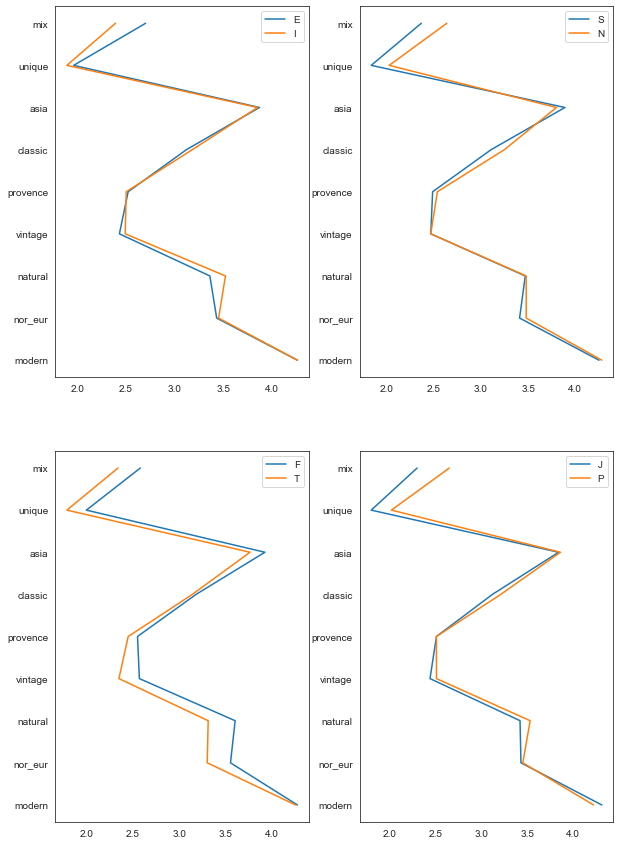

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

mood = ['modern','nor_eur',   'natural',   'vintage',   'provence',   'classic',   'asia',   'unique',   'mix']
mood_list = []
for i in mood:
    mood_list.append(round(mbti_df[mbti_df['EI']=='E'][i].mean(),2))

mood_list2 = []
for i in mood:
    mood_list2.append(round(mbti_df[mbti_df['EI']=='I'][i].mean(),2))

mood_list3 = []
for i in mood:
    mood_list3.append(round(mbti_df[mbti_df['SN']=='S'][i].mean(),2))

mood_list4 = []
for i in mood:
    mood_list4.append(round(mbti_df[mbti_df['SN']=='N'][i].mean(),2))

mood_list5 = []
for i in mood:
    mood_list5.append(round(mbti_df[mbti_df['FT']=='F'][i].mean(),2))

mood_list6 = []
for i in mood:
    mood_list6.append(round(mbti_df[mbti_df['FT']=='T'][i].mean(),2))

mood_list7 = []
for i in mood:
    mood_list7.append(round(mbti_df[mbti_df['JP']=='J'][i].mean(),2))

mood_list8 = []
for i in mood:
    mood_list8.append(round(mbti_df[mbti_df['JP']=='P'][i].mean(),2))


plt.figure(figsize=(10,15))

# 2x2 행렬의 첫번째
plt.subplot(221)
plt.plot(mood_list, mood, label='E')
plt.plot(mood_list2,mood, label='I')
plt.legend(ncol=1)

# 2x2 행렬의 두번째
plt.subplot(222)
plt.plot(mood_list3, mood,  label='S')
plt.plot(mood_list4,mood,  label='N')
plt.legend(ncol=1)



plt.subplot(223)
plt.plot(mood_list5, mood,  label='F')
plt.plot(mood_list6,mood,  label='T')
plt.legend(ncol=1)


plt.subplot(224)
plt.plot(mood_list7, mood,  label='J')
plt.plot(mood_list8,mood,  label='P')
plt.legend(ncol=1)


plt.show()

In [9]:
# like_mbti라는 새로운 데이터프레임 생성 (좋아하거나 싫어하는 무드를 모아놓은 데이터프레임)
like_mbti_mbti= ['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']
like_mbti = pd.DataFrame({'mbti':like_mbti_mbti})

In [10]:
like_mbti.set_index('mbti',inplace=True)

In [11]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    like_mbti[mood+'_like'] = 0
    like_mbti[mood+'_hate'] = 0
like_mbti

,modern_like,modern_hate,nor_eur_like,nor_eur_hate,natural_like,natural_hate,vintage_like,vintage_hate,provence_like,provence_hate,classic_like,classic_hate,asia_like,asia_hate,unique_like,unique_hate,mix_like,mix_hate
mbti,,,,,,,,,,,,,,,,,,
ENFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENFP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENTP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESFP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# 5점을 준 mbti 뽑기
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']

for mood in moods:
    a = 1
    like_mbti_5_score= mbti_df['real_mbti'][mbti_df[mood]==5].values
    like_mbti_1_score= mbti_df['real_mbti'][mbti_df[mood]==1].values
    
    if a == 1:
        count= {}
        for lst in like_mbti_5_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_like'][key] = value
        a = 0
            
    if a == 0:
        count= {}
        for lst in like_mbti_1_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_hate'][key] = value

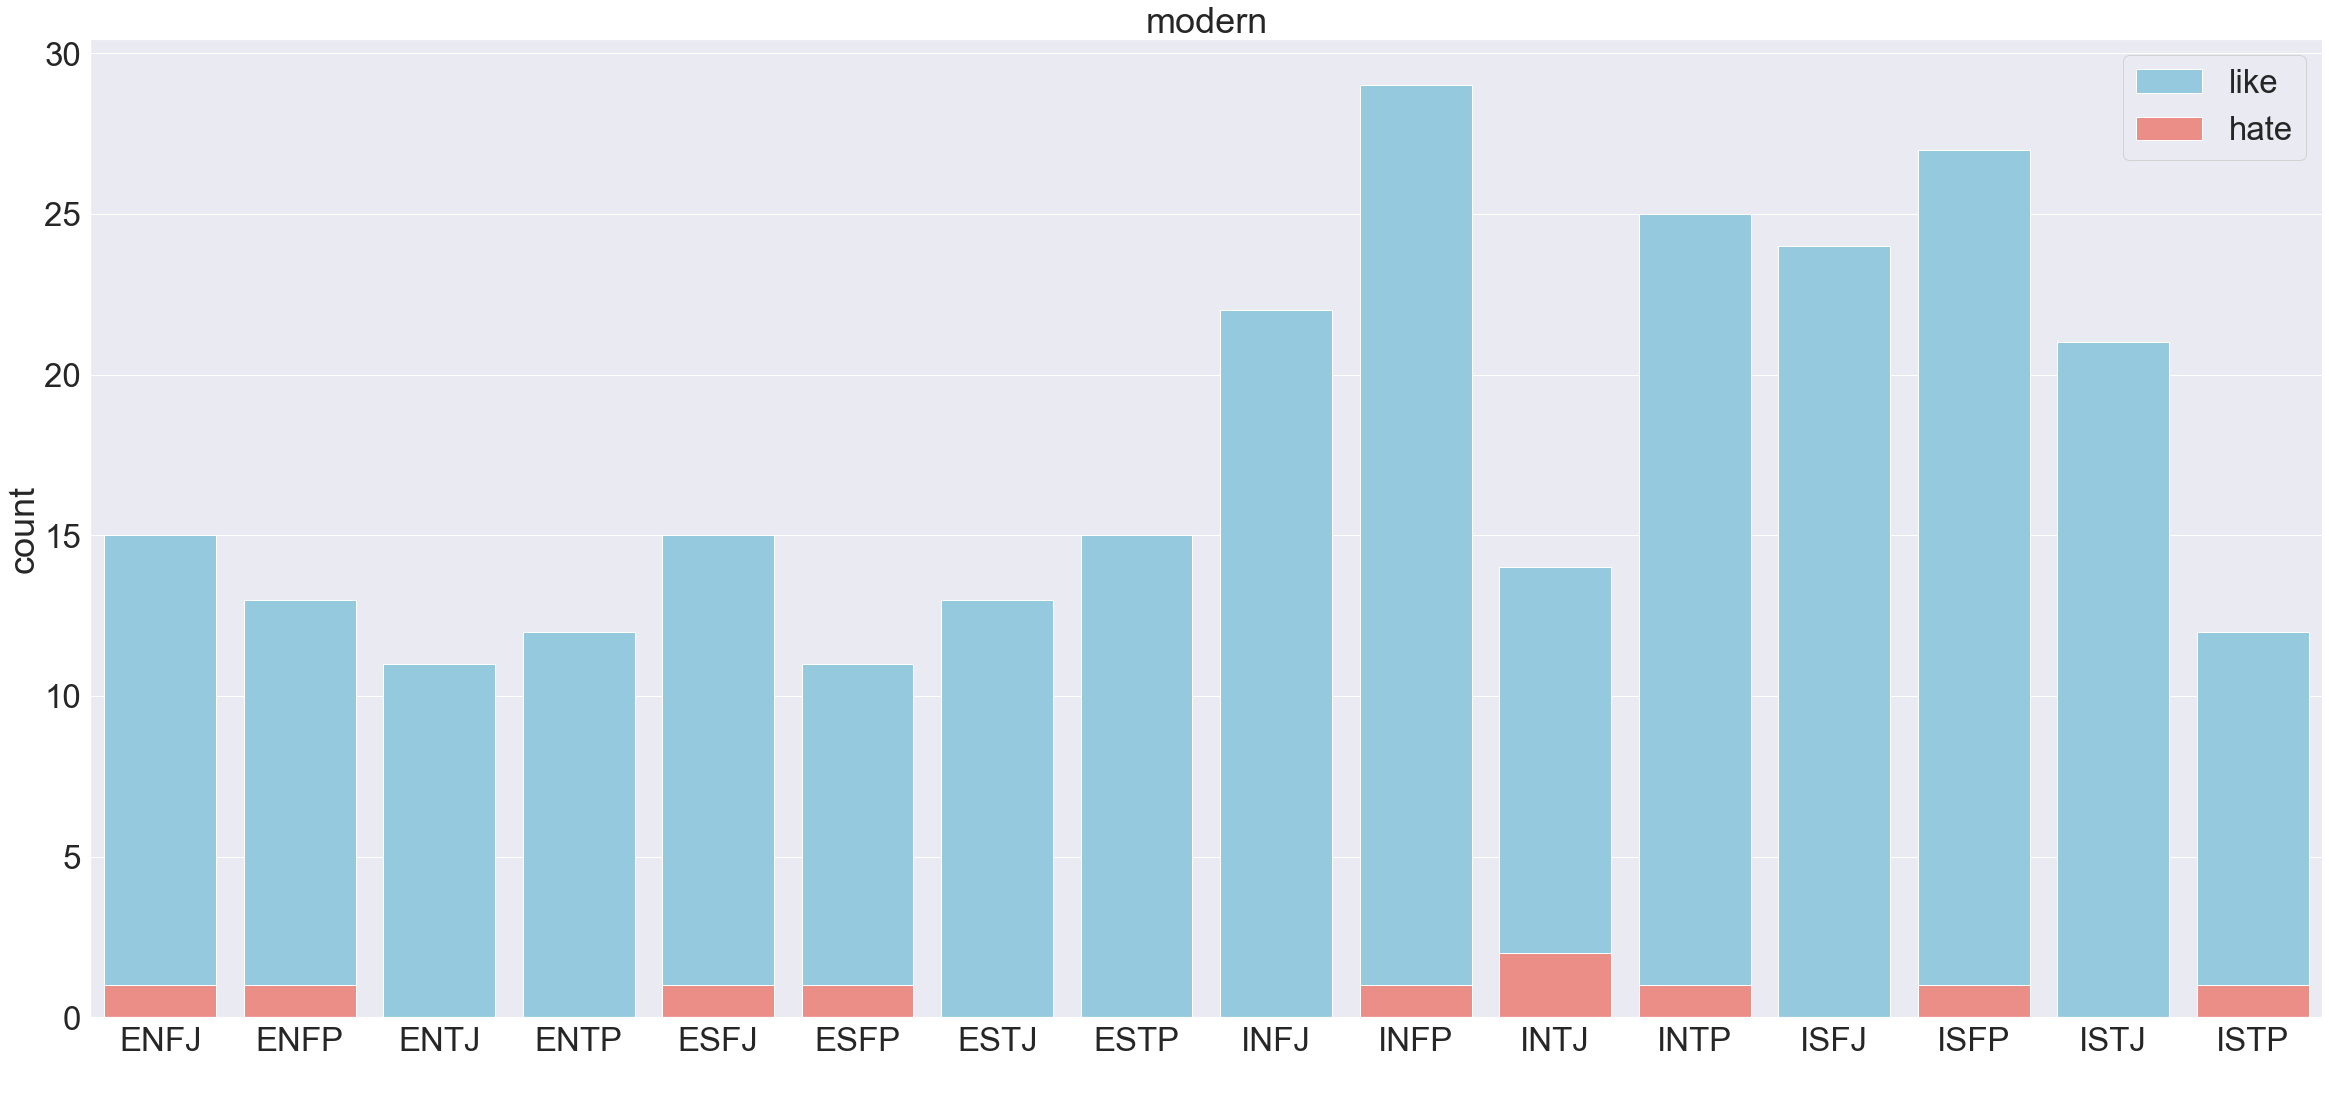

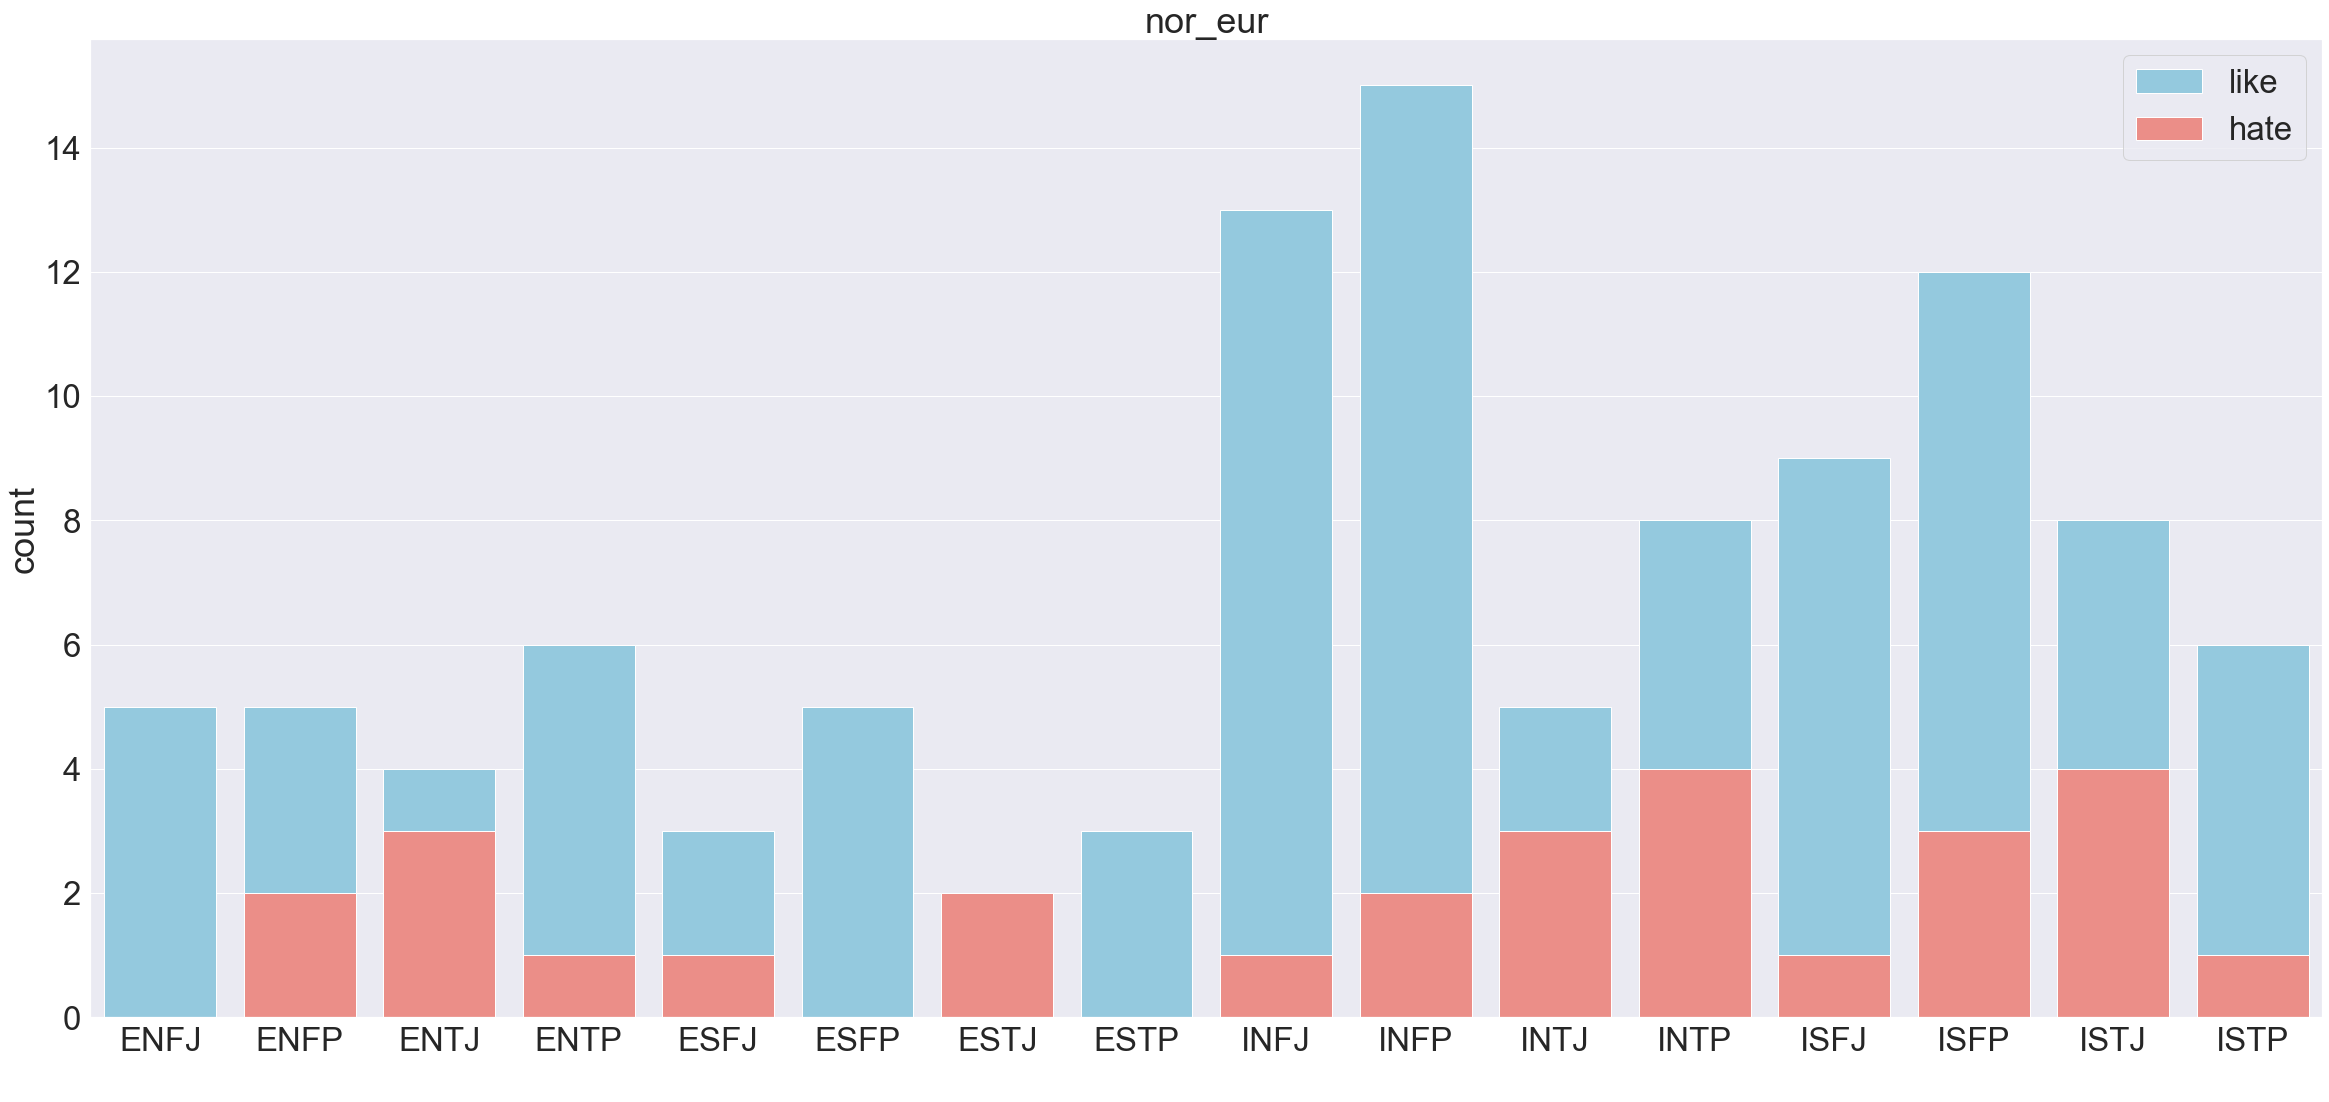

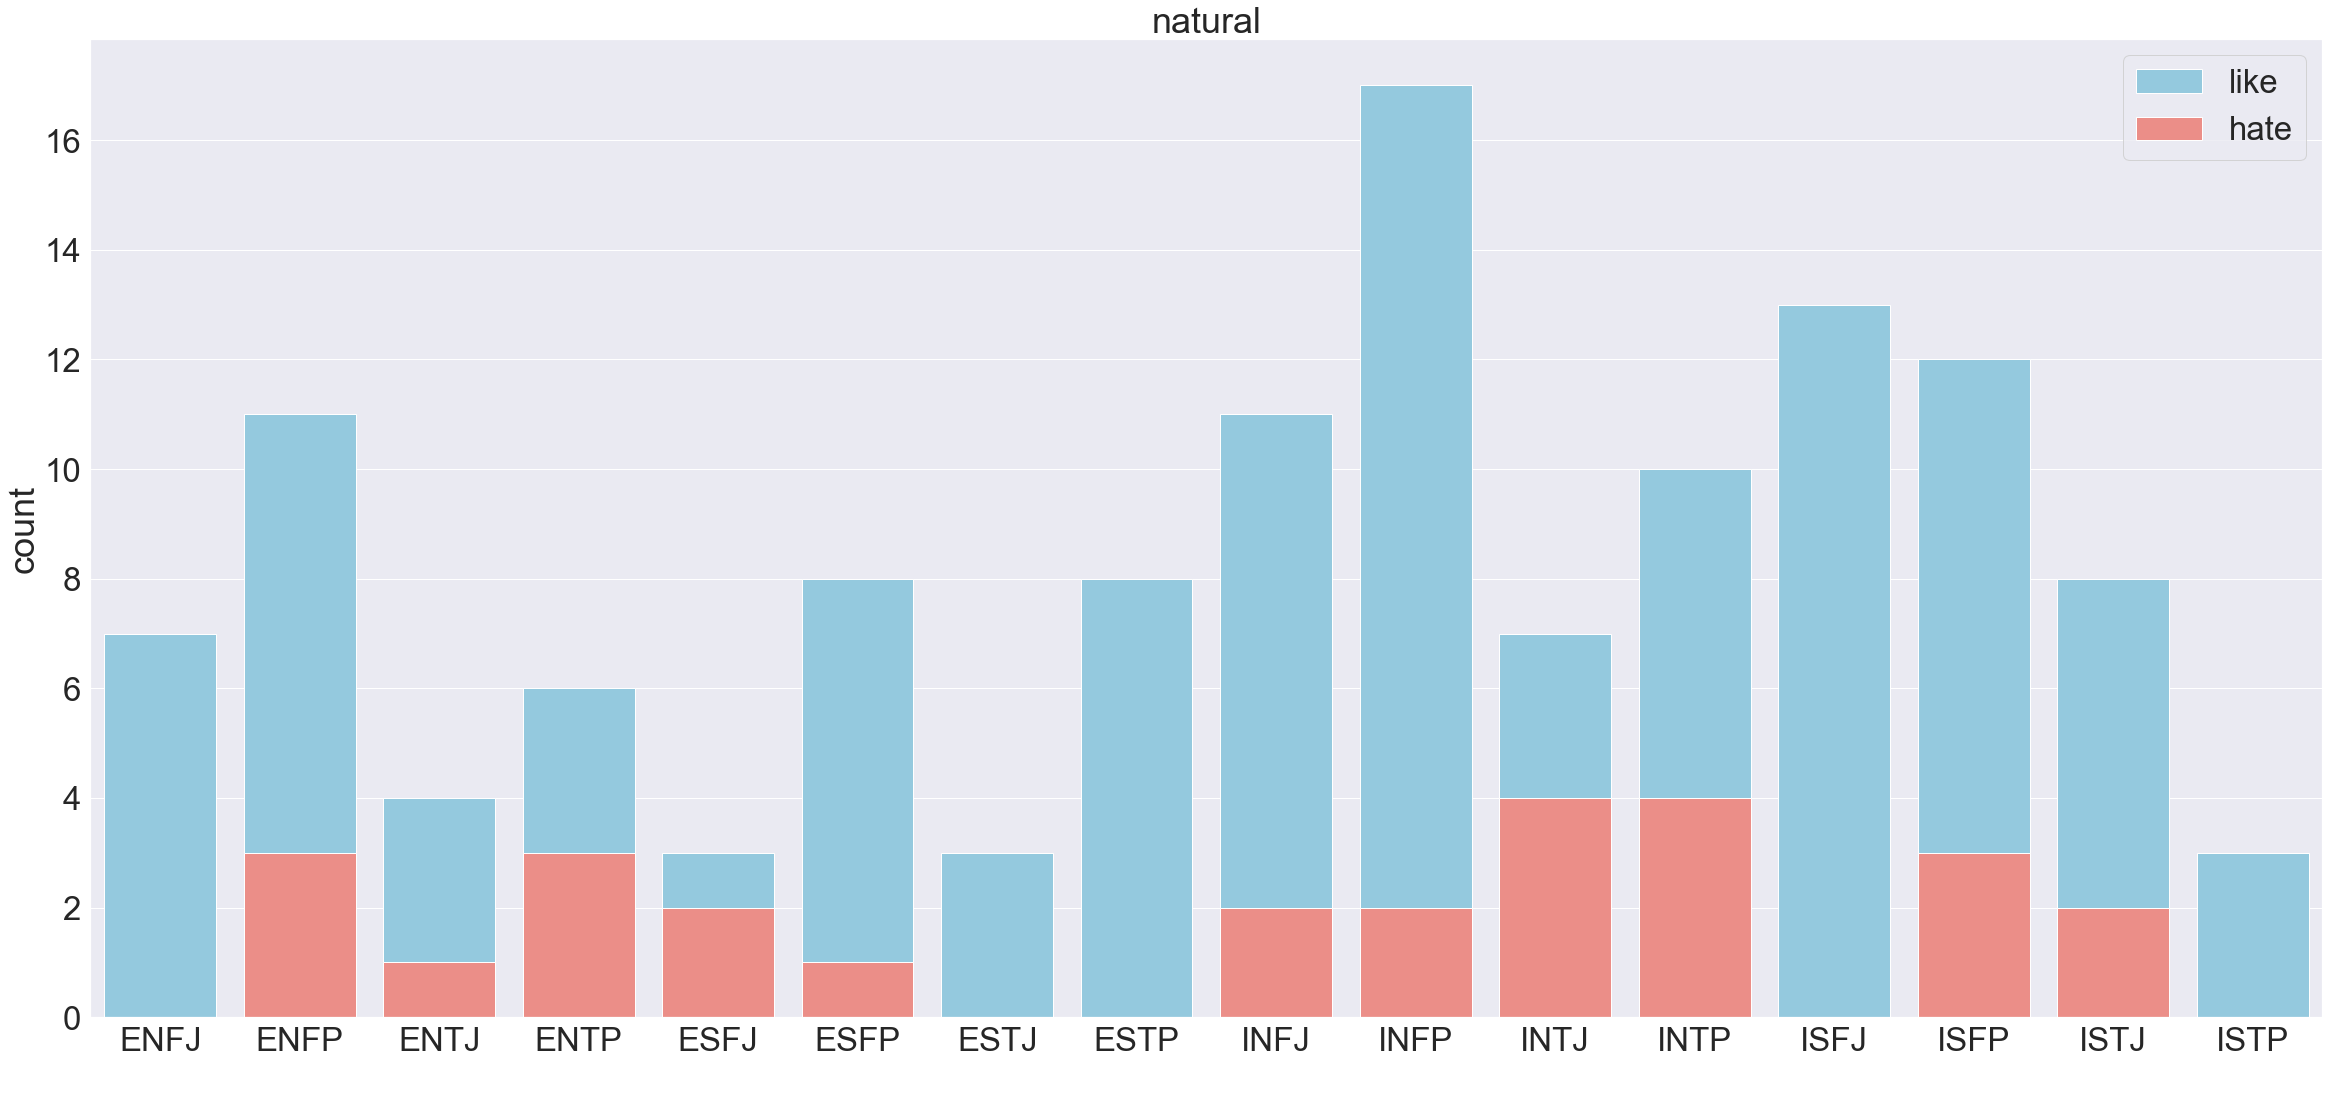

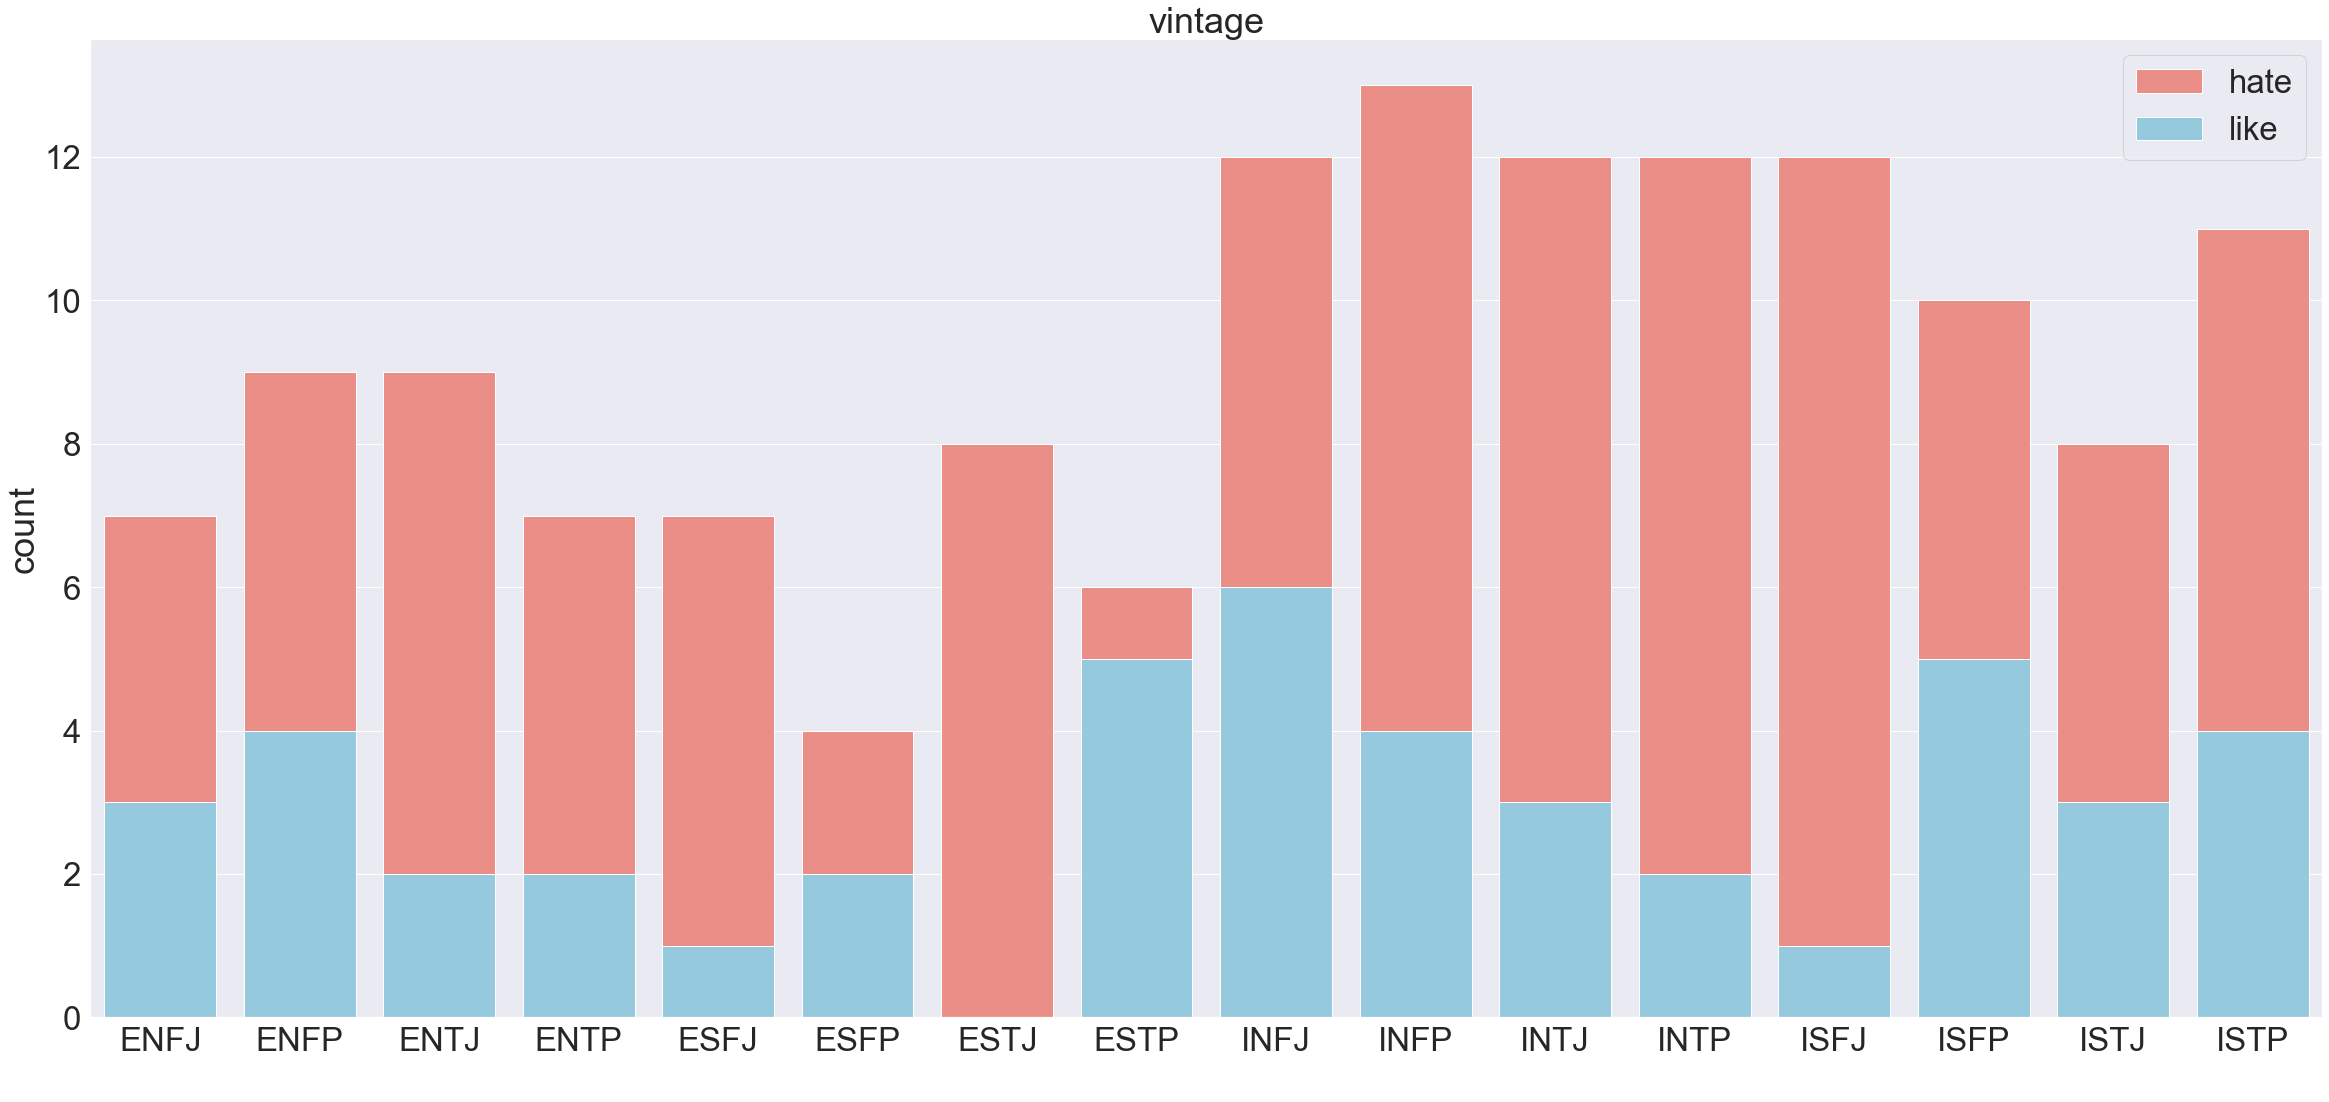

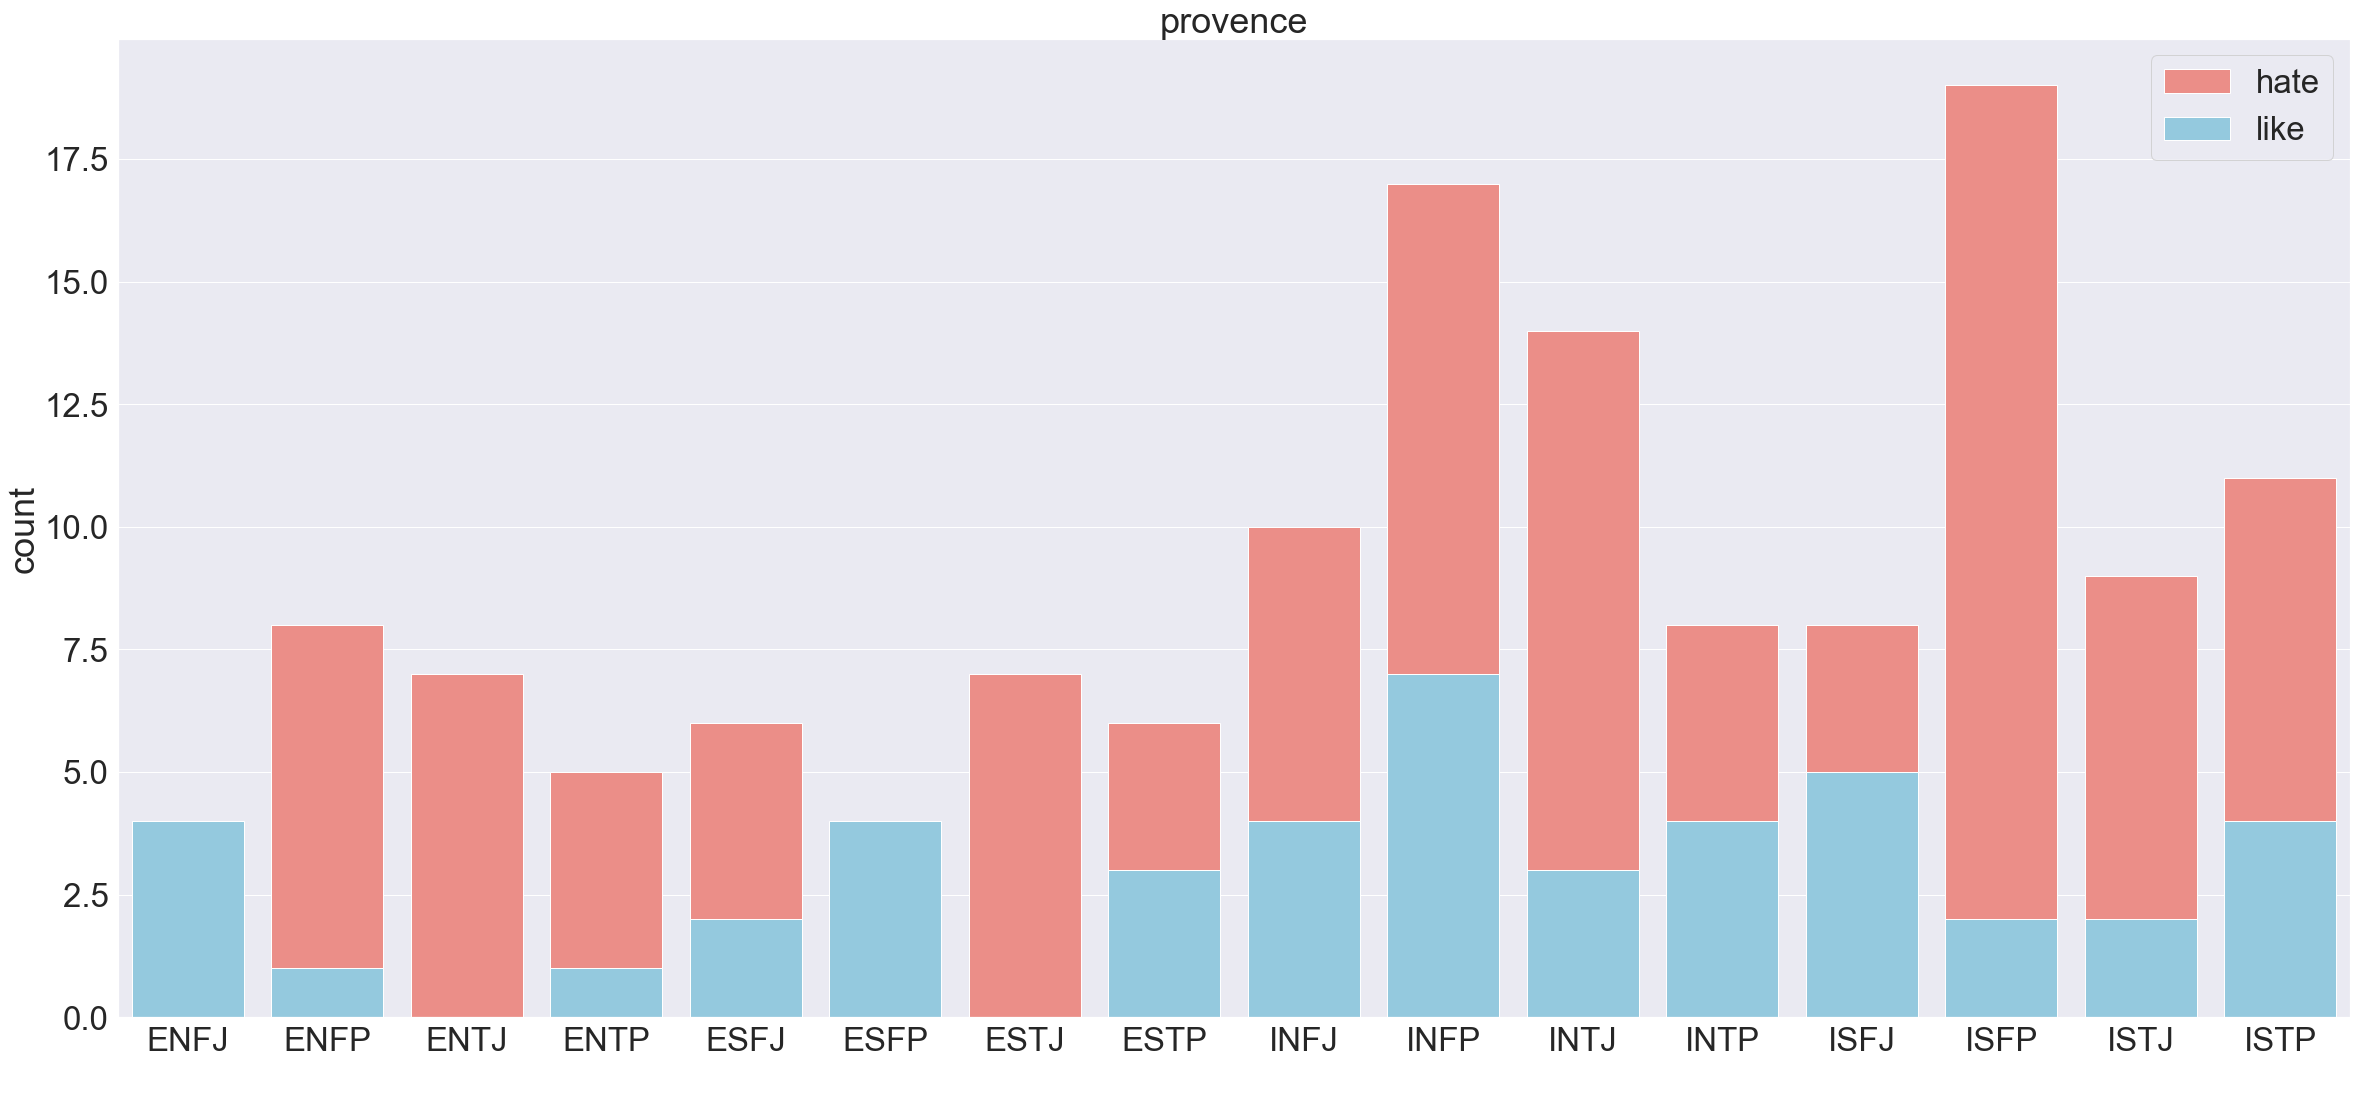

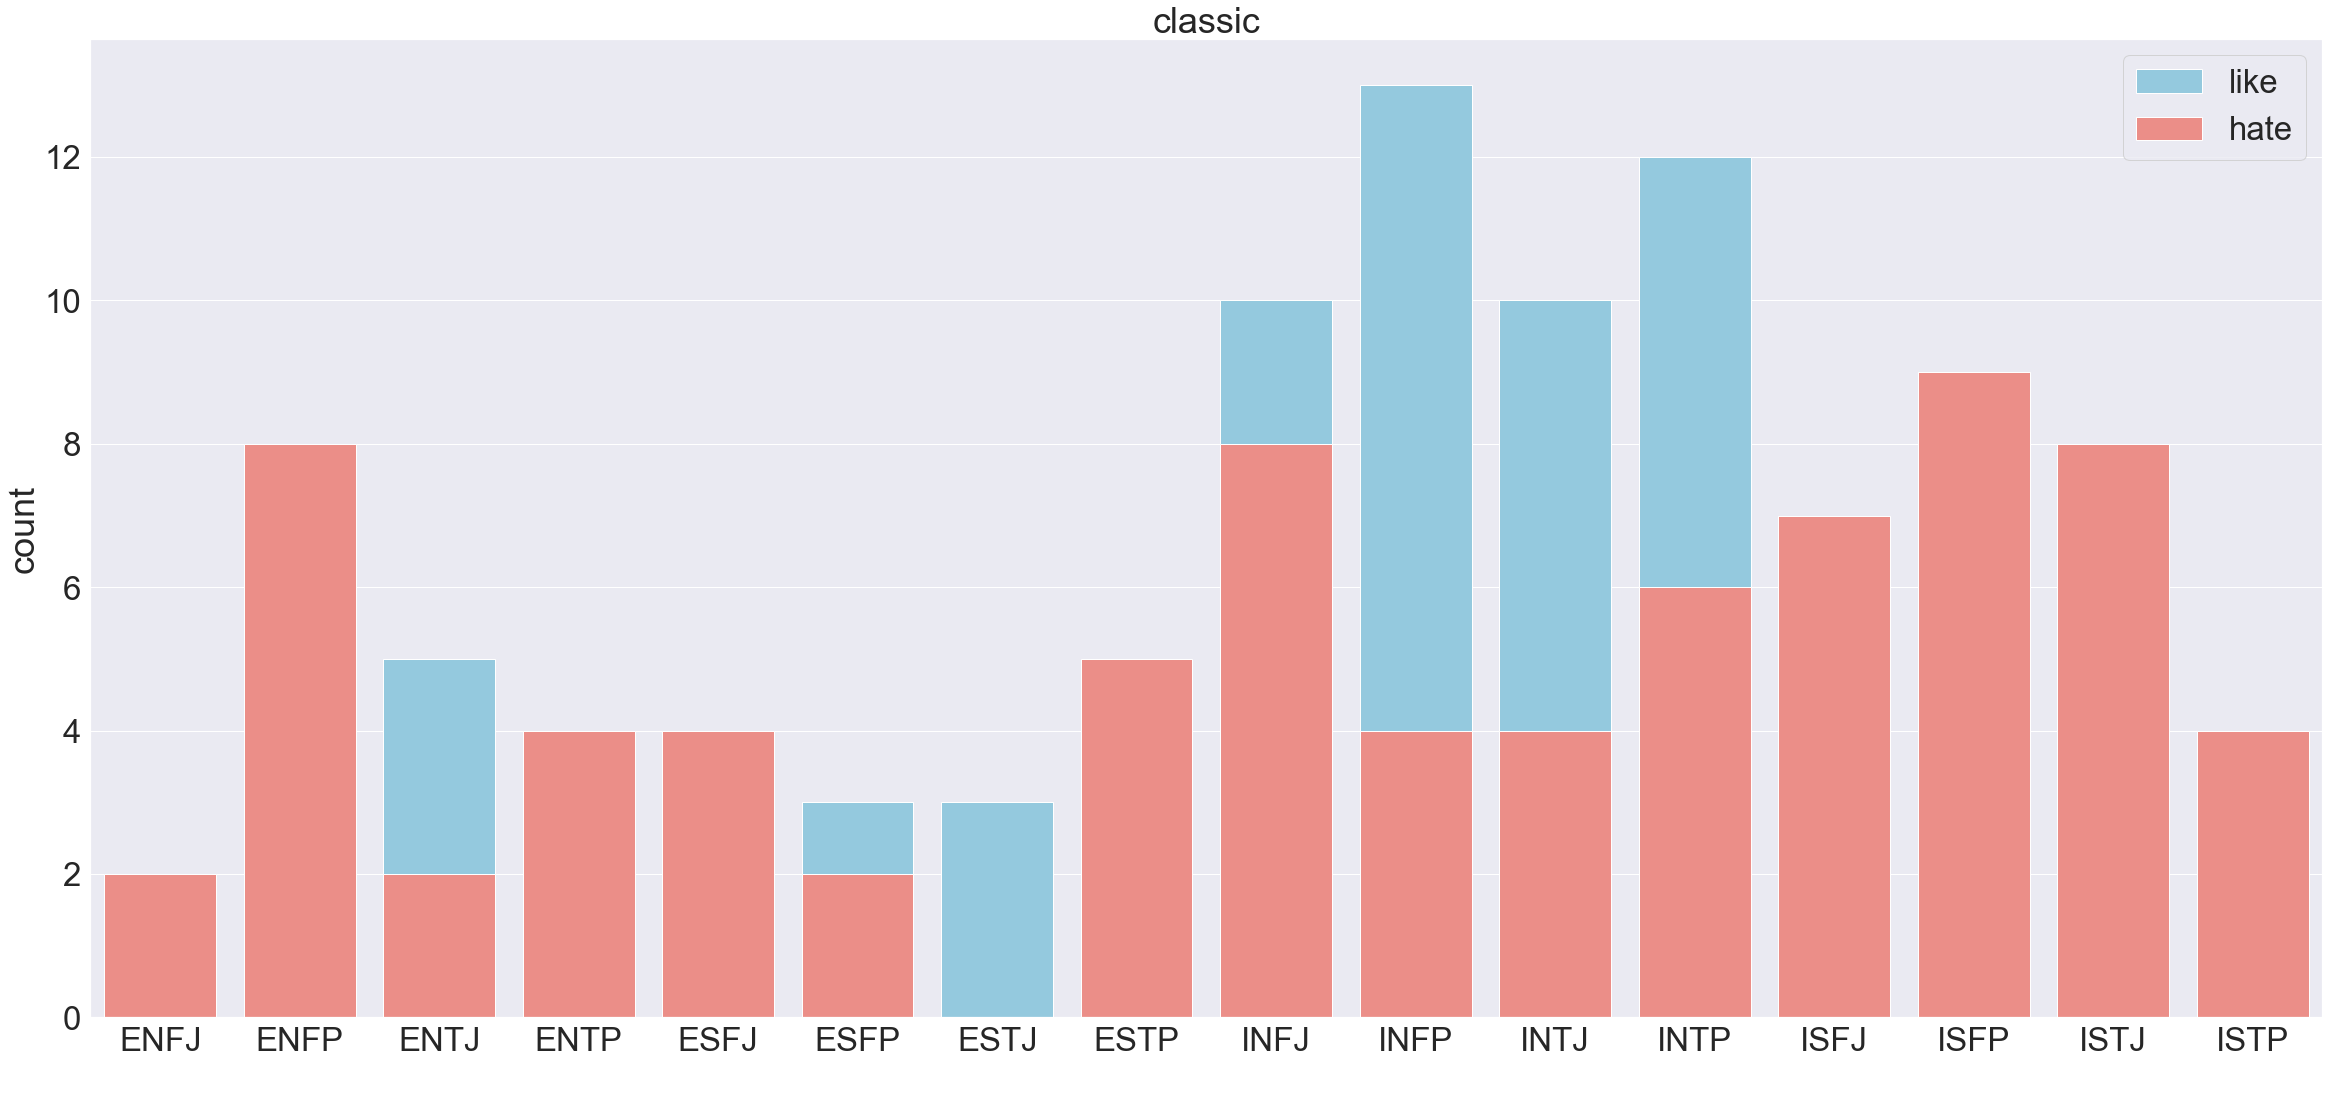

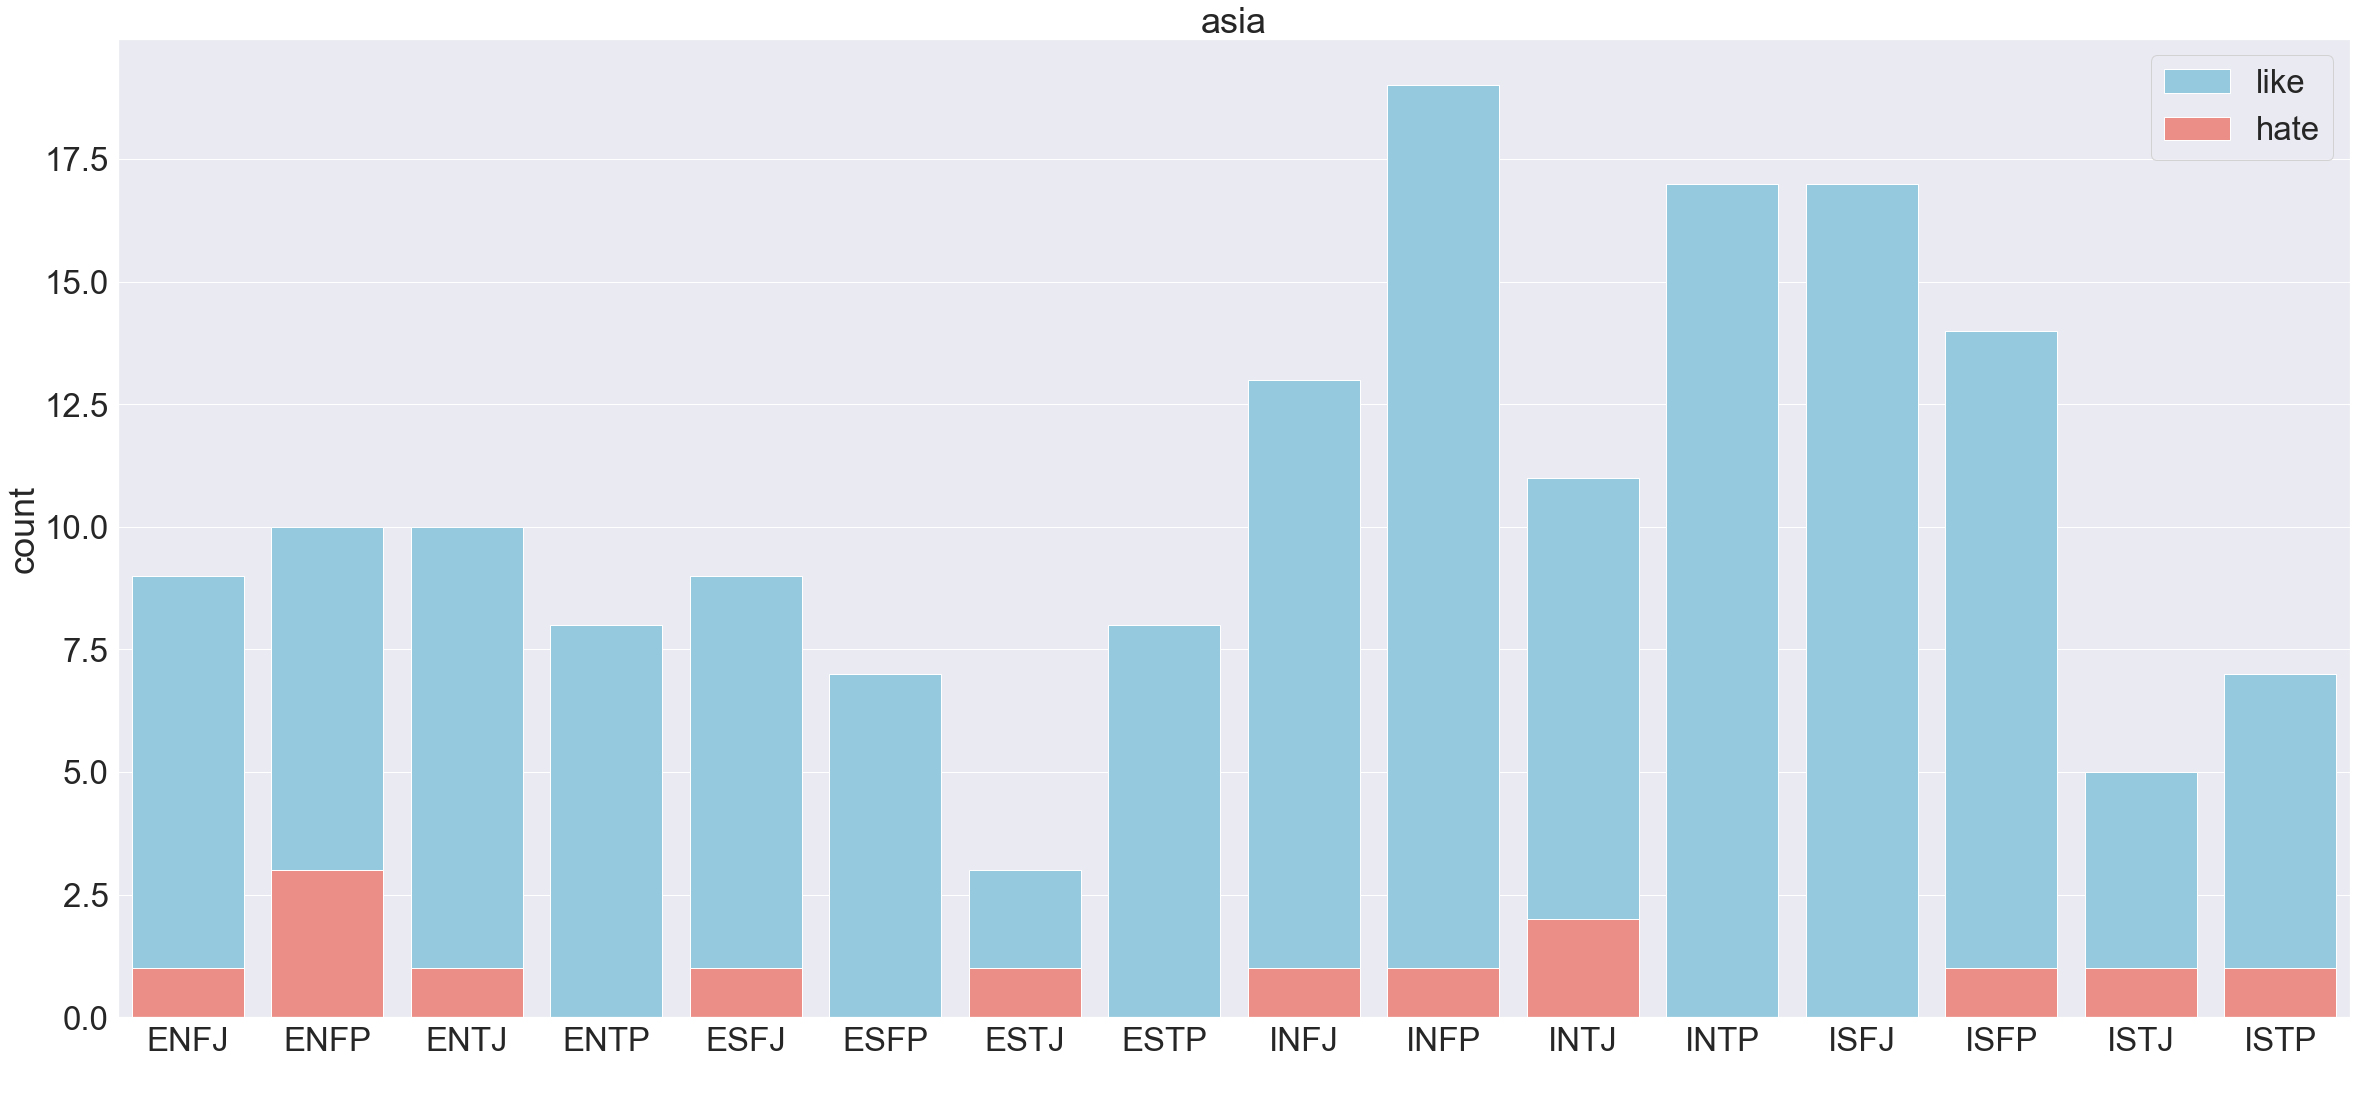

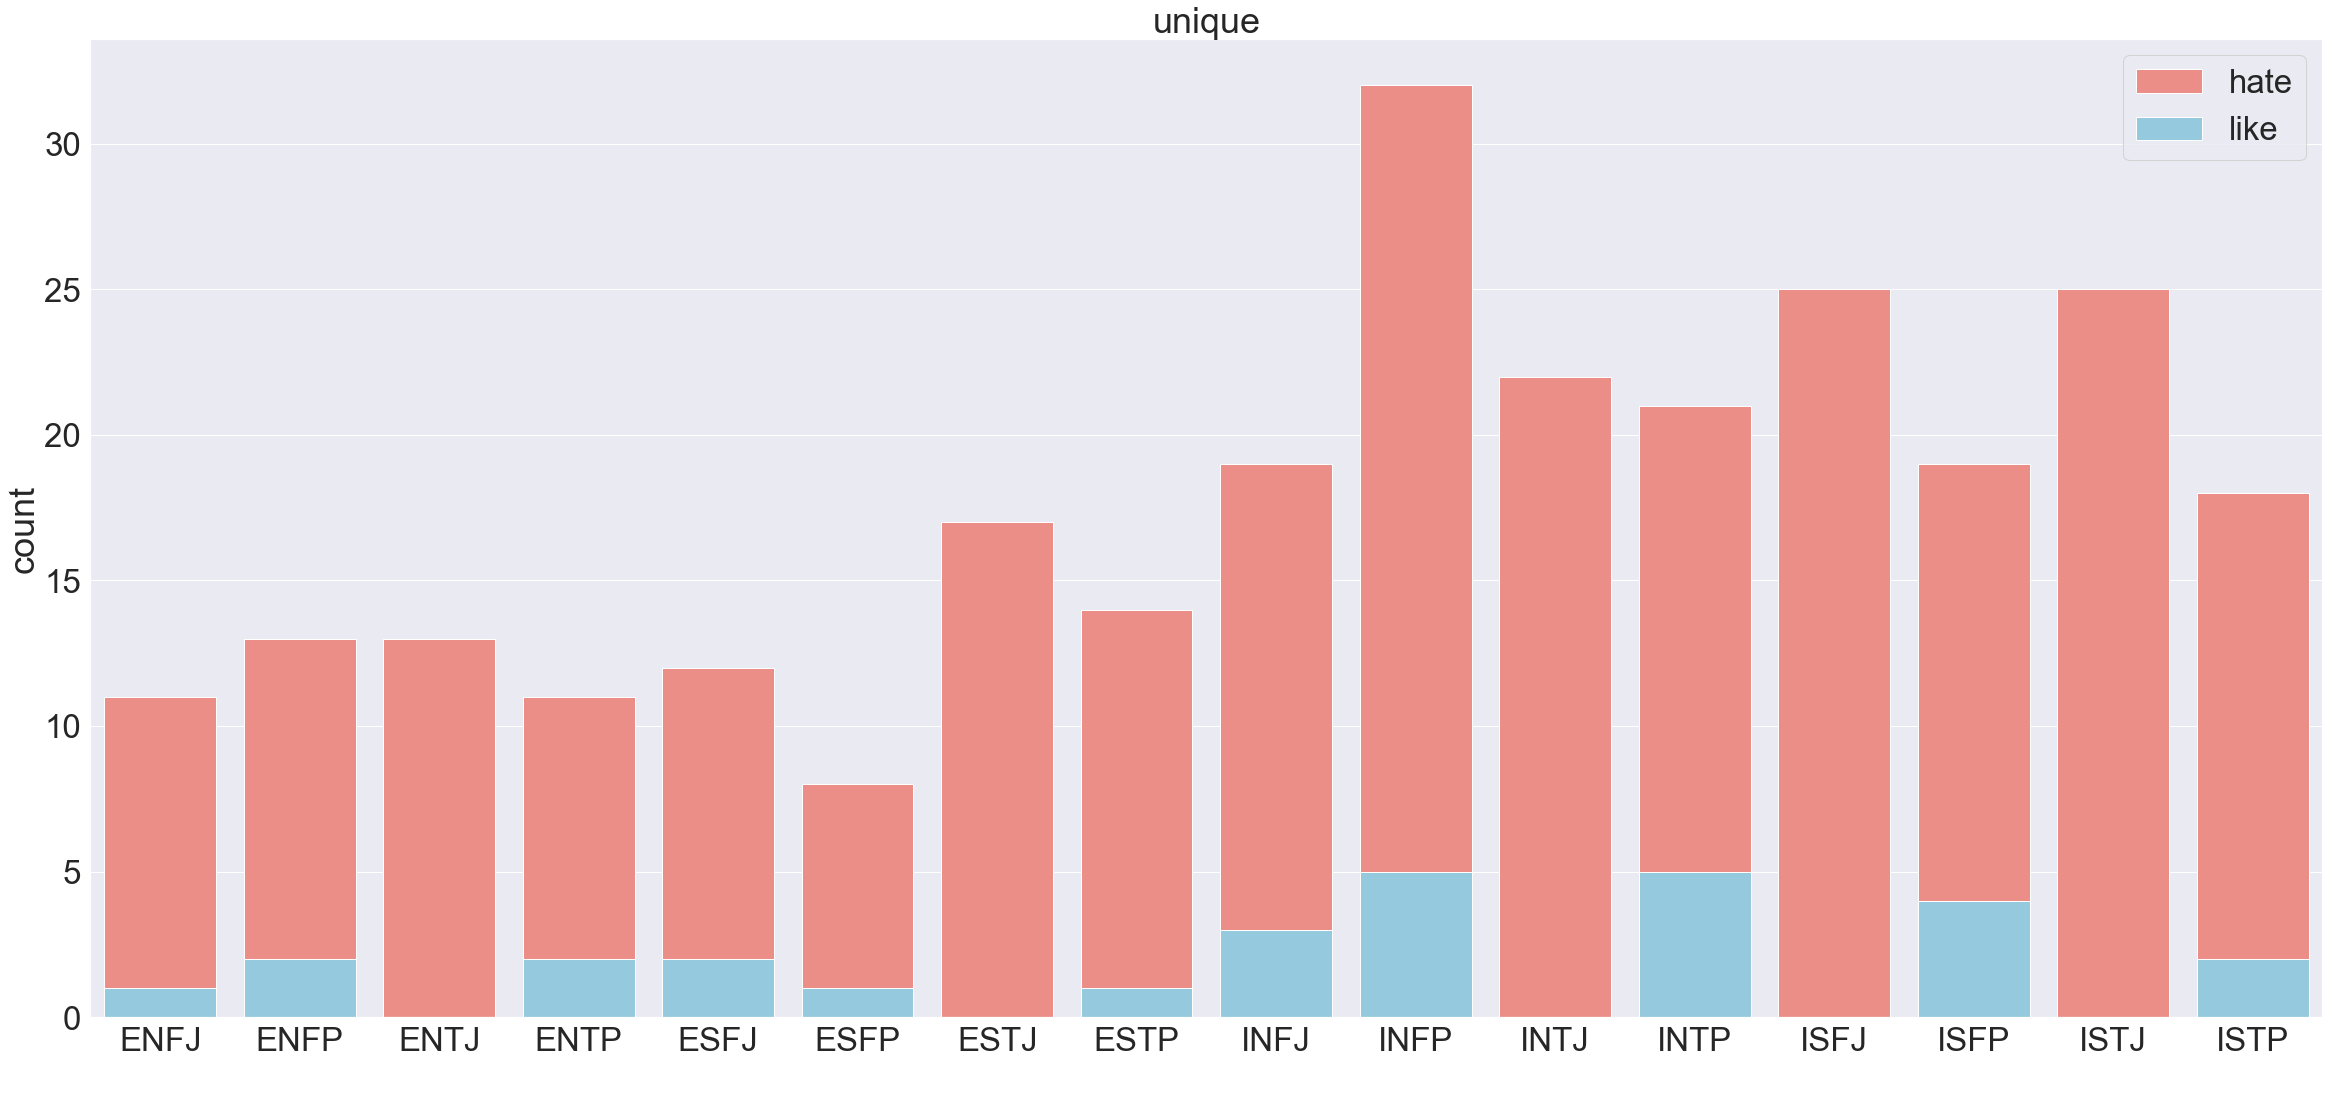

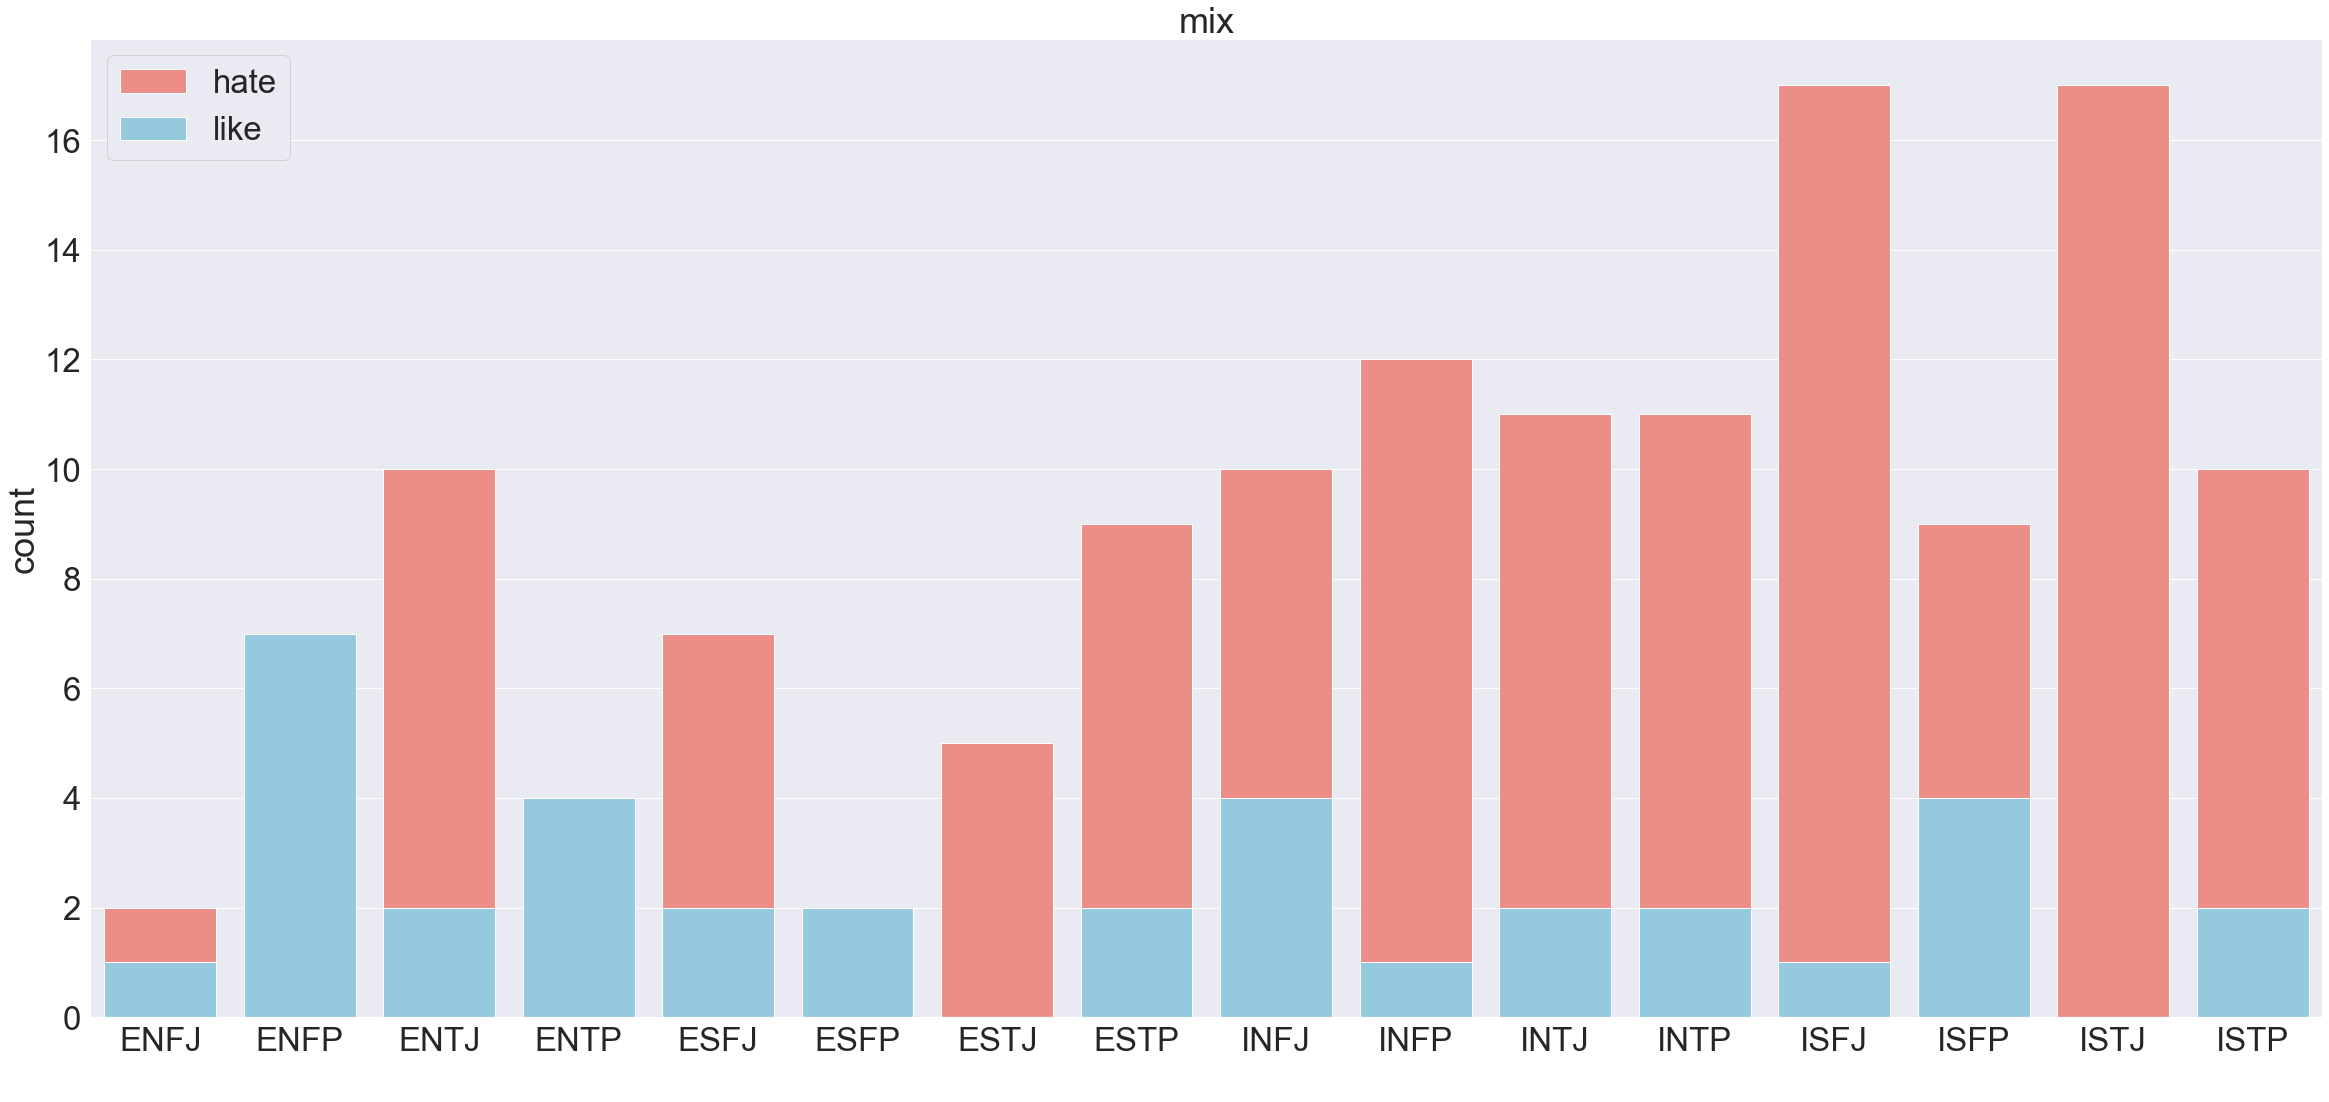

In [13]:
# 각각 무드의 5점과 1점 mbti 그래프
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    fig = plt.figure(figsize=(40,18))

    sns.set(font_scale=3)
    
    score_5 = like_mbti[mood+'_like'].values.sum()
    score_1 = like_mbti[mood+'_hate'].values.sum()
    
    if score_5 > score_1:
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    elif score_1 >= score_5:
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    plt.show()

In [14]:
# copy를 하지않고 그냥 변수로 저장하게 되면 like_mbti가 like_mbti1으로 덮어지므로 copy 사용
like_mbti1 = like_mbti.copy()
# mbti별 좋아하는(5점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_like_mbti = like_mbti1
for mood in moods:
    mood_like_mbti[mood] = like_mbti1[mood+'_like']
    del(mood_like_mbti[mood+'_like'])
    del(mood_like_mbti[mood+'_hate'])

In [15]:
mood_like_mbti = mood_like_mbti.transpose()

In [16]:
mood_like_mbti

mbti,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
modern,15,13,11,12,15,11,13,15,22,29,14,25,24,27,21,12
nor_eur,5,5,4,6,3,5,2,3,13,15,5,8,9,12,8,6
natural,7,11,4,6,3,8,3,8,11,17,7,10,13,12,8,3
vintage,3,4,2,2,1,2,0,5,6,4,3,2,1,5,3,4
provence,4,1,0,1,2,4,0,3,4,7,3,4,5,2,2,4
classic,2,5,5,4,1,3,3,4,10,13,10,12,5,9,7,3
asia,9,10,10,8,9,7,3,8,13,19,11,17,17,14,5,7
unique,1,2,0,2,2,1,0,1,3,5,0,5,0,4,0,2
mix,1,7,2,4,2,2,0,2,4,1,2,2,1,4,0,2


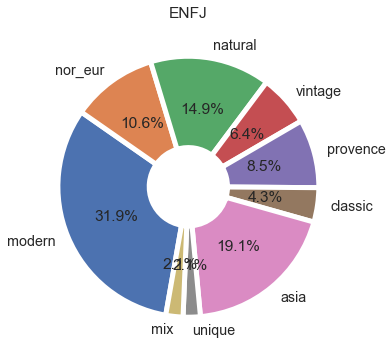

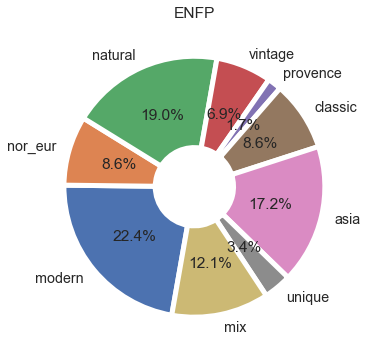

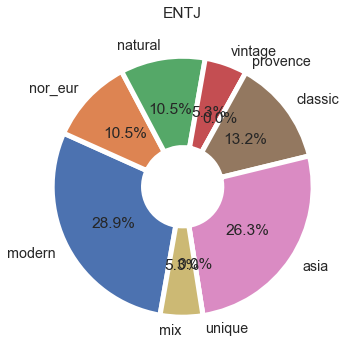

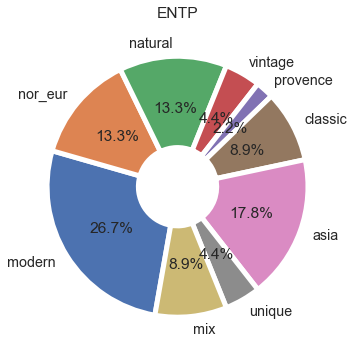

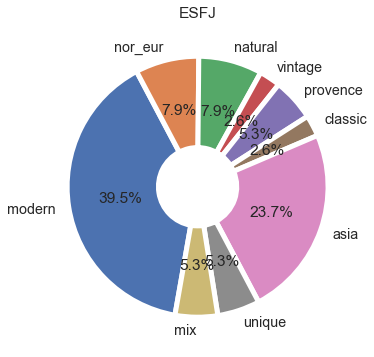

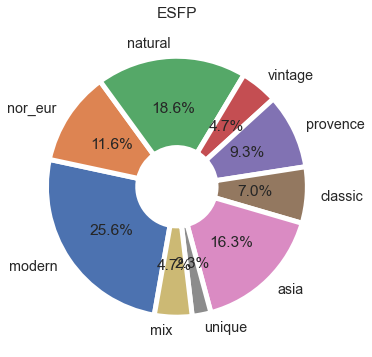

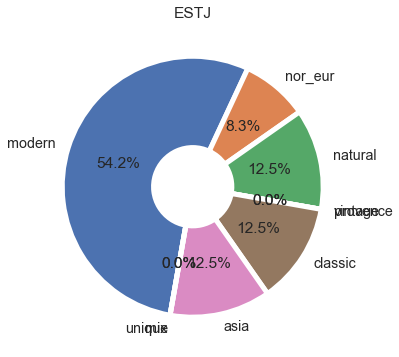

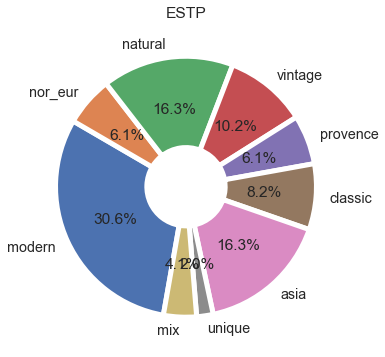

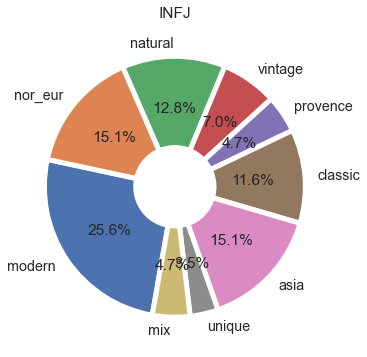

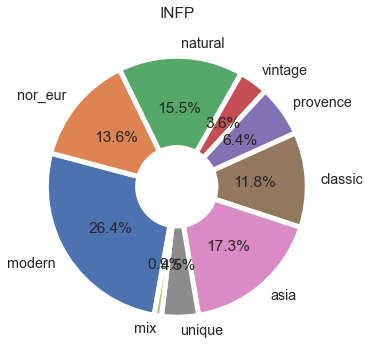

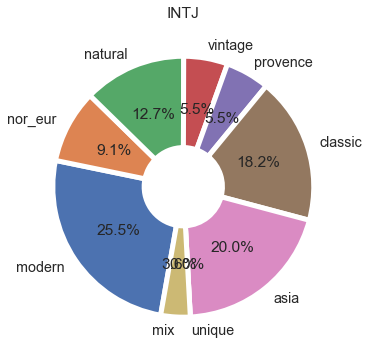

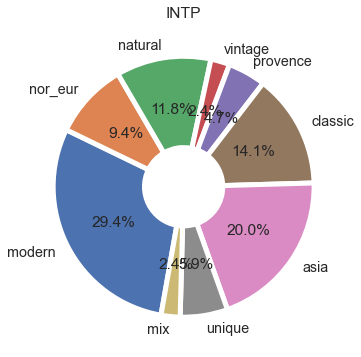

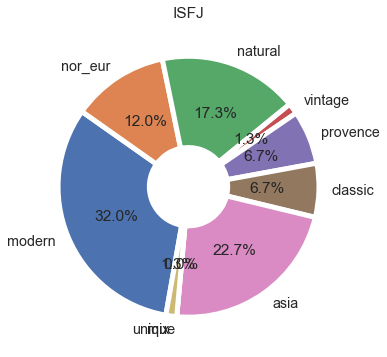

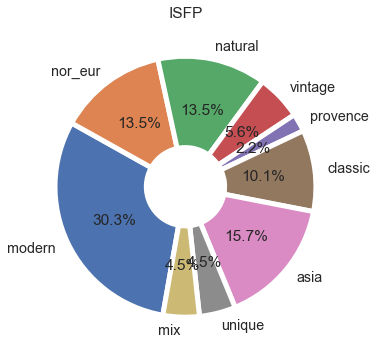

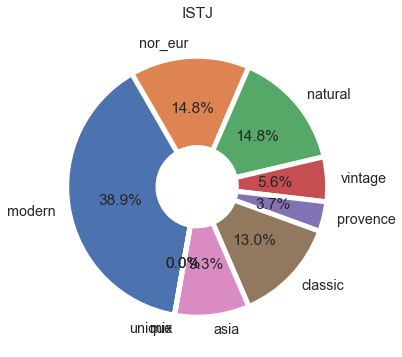

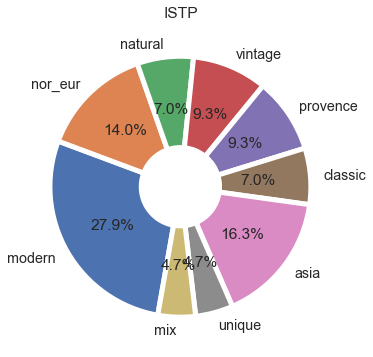

In [17]:
# mbti 컬럼값
mbtis = mood_like_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_like_mbti[mbti]
    # 이름
    labels = mood_like_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

In [18]:
like_mbti2 = like_mbti
# mbti별 싫어하는(1점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_hate_mbti = like_mbti2
for mood in moods:
    mood_hate_mbti[mood] = like_mbti2[mood+'_hate']
    del(mood_hate_mbti[mood+'_like'])
    del(mood_hate_mbti[mood+'_hate'])

In [19]:
mood_hate_mbti = mood_hate_mbti.transpose()

In [20]:
mood_hate_mbti

mbti,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
modern,1,1,0,0,1,1,0,0,0,1,2,1,0,1,0,1
nor_eur,0,2,3,1,1,0,2,0,1,2,3,4,1,3,4,1
natural,0,3,1,3,2,1,0,0,2,2,4,4,0,3,2,0
vintage,7,9,9,7,7,4,8,6,12,13,12,12,12,10,8,11
provence,2,8,7,5,6,2,7,6,10,17,14,8,8,19,9,11
classic,2,8,2,4,4,2,0,5,8,4,4,6,7,9,8,4
asia,1,3,1,0,1,0,1,0,1,1,2,0,0,1,1,1
unique,11,13,13,11,12,8,17,14,19,32,22,21,25,19,25,18
mix,2,7,10,4,7,2,5,9,10,12,11,11,17,9,17,10


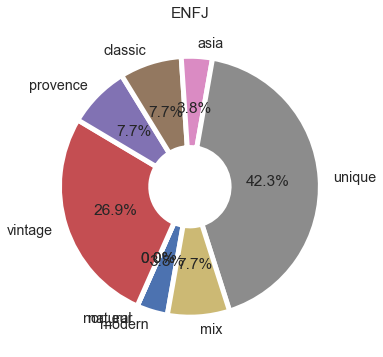

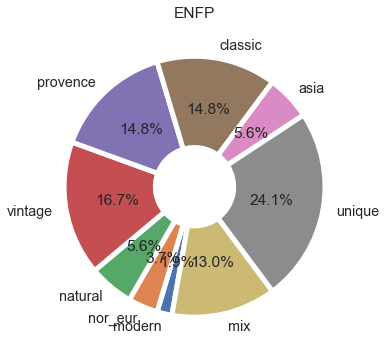

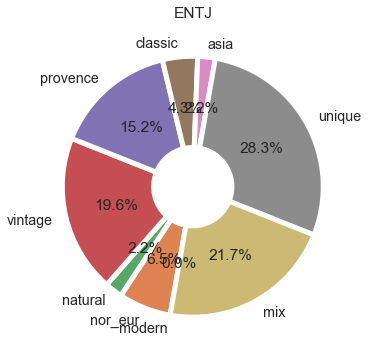

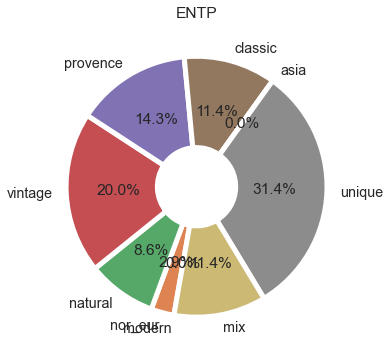

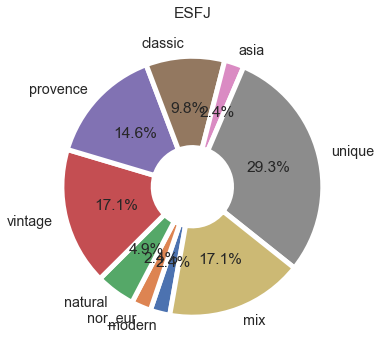

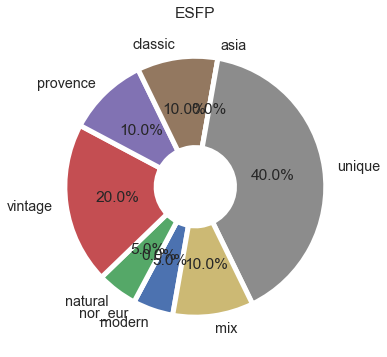

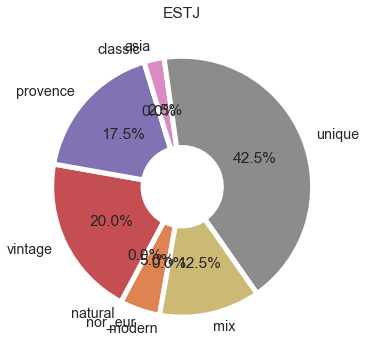

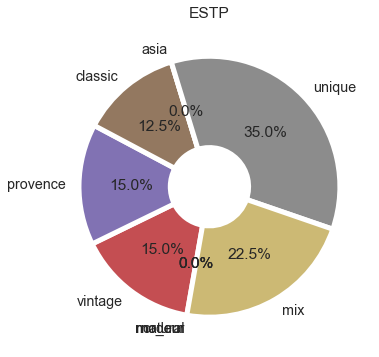

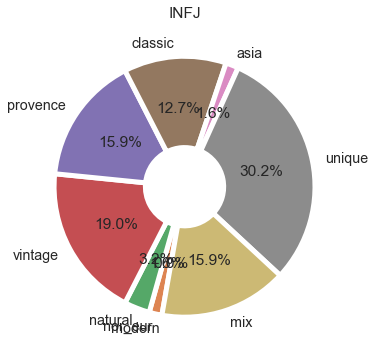

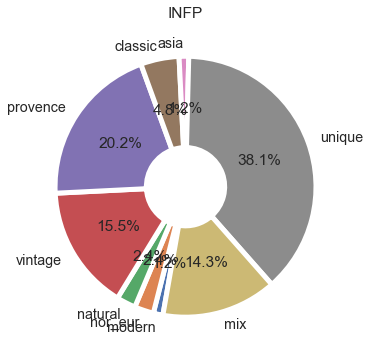

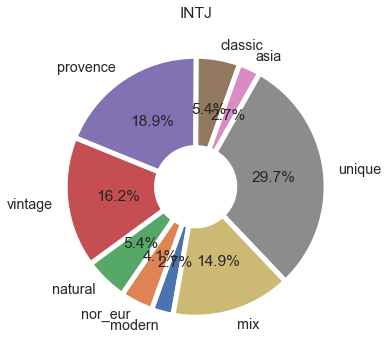

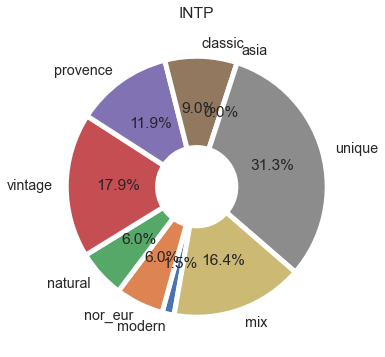

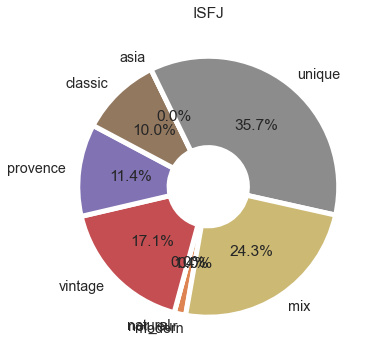

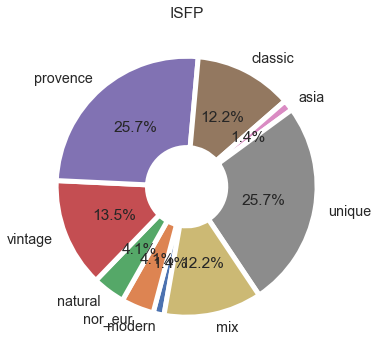

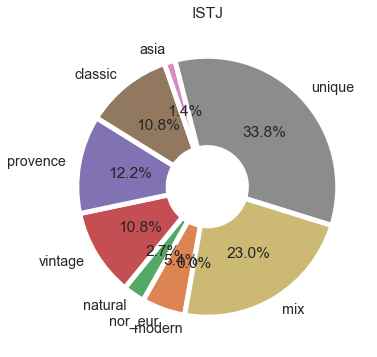

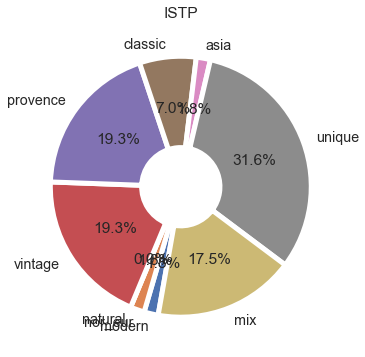

In [21]:
# mbti 컬럼값
mbtis = mood_hate_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_hate_mbti[mbti]
    # 이름
    labels = mood_hate_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

# 성향 두개씩

In [22]:
# 성향 4개 항목 2개 조합
personality_2ea = []

# mbti 성향 4개
personality = [['E', 'I'], ['S', 'N'], ['F', 'T'], ['J', 'P']]

for i in list(combinations(personality, 2)): # 항목 4개중 2개 선택 (4C2)
    for j in list(product(*i)): # 2개 선택한 것들에서 2개 중 1개씩 선택 (2C1 x 2C1)
        personality_2ea.append(str(j[0] + j[1])) # str으로 바꿔서 리스트로
personality_2ea = np.array(personality_2ea).astype('object')
personality_2ea

array(['ES', 'EN', 'IS', 'IN', 'EF', 'ET', 'IF', 'IT', 'EJ', 'EP', 'IJ',
       'IP', 'SF', 'ST', 'NF', 'NT', 'SJ', 'SP', 'NJ', 'NP', 'FJ', 'FP',
       'TJ', 'TP'], dtype=object)

In [23]:
df2 = mbti_df.copy()
df2 = df2[['real_mbti', 'real_EI', 'real_SN', 'real_FT', 'real_JP']]
df2[personality_2ea] = 0
df2

,real_mbti,real_EI,real_SN,real_FT,real_JP,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,I,N,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,INFP,I,N,F,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,INFJ,I,N,F,J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTP,E,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
570,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
571,INTP,I,N,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
572,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
for i in range(len(df2.index)):
    mbli1 = []
    for j in df2.loc[i, "real_EI":"real_JP"]:
        mbli1.append(j)
    mbli1 = list(combinations(mbli1, 2))
    mbli2 = []
    for k in mbli1:
        mbli2.append(k[0]+k[1])
    for col in df2.columns:
        if col in mbli2:
            df2.loc[i, (col)] = 1
df2

,real_mbti,real_EI,real_SN,real_FT,real_JP,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,I,N,F,P,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,I,N,F,J,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,E,S,T,P,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [25]:
mbti_df[personality_2ea] = df2.iloc[:, 5:]
mbti_df

,mbti,job,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,EI,SN,FT,JP,mbti_guess,real_mbti,real_EI,real_SN,real_FT,real_JP,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,무직,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,대학생,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,I,N,F,P,INFP,INFP,I,N,F,P,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,대학생,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,무직,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,F,J,ISFJ,INFJ,I,N,F,J,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,무직,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,E,S,T,P,ESTP,ESTP,E,S,T,P,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,대학생,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,직장인,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,대학생,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,I,N,T,P,INTP,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,직장인,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,I,N,F,J,INFJ,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [26]:
mbti_df2 = mbti_df.iloc[:, 3: 12]
mbti_df2[personality_2ea] = mbti_df.iloc[:, 35:]
mbti_df2

,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,5,3,3,3,4,3,5,2,3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,5,4,3,1,1,2,3,1,4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,5,4,3,1,1,1,3,1,4,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,5,3,4,1,1,1,5,1,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,5,3,4,1,2,1,4,1,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,5,3,2,1,3,2,2,3,2,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,4,4,4,4,3,4,3,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,4,3,3,4,4,5,5,2,2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,5,2,2,1,2,3,4,4,3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [27]:
avg = []
a = []
for i in personality_2ea:
    for j in moods:
        a.append(round(np.mean(mbti_df2.loc[:, j][mbti_df2[i]==1].values), 2))
    avg.append(a)
    a=[]
avg

[[4.44, 3.36, 3.5, 2.36, 2.52, 3.14, 3.93, 1.69, 2.43],
 [4.17, 3.5, 3.45, 2.64, 2.55, 3.15, 3.78, 2.07, 2.74],
 [4.31, 3.49, 3.43, 2.39, 2.42, 2.97, 3.84, 1.79, 2.26],
 [4.2, 3.4, 3.52, 2.49, 2.55, 3.35, 3.87, 2.02, 2.53],
 [4.21, 3.47, 3.57, 2.58, 2.7, 3.02, 3.83, 2.06, 2.84],
 [4.35, 3.41, 3.35, 2.46, 2.35, 3.28, 3.85, 1.75, 2.35],
 [4.25, 3.56, 3.63, 2.47, 2.55, 3.17, 3.92, 1.99, 2.52],
 [4.25, 3.27, 3.27, 2.41, 2.41, 3.18, 3.77, 1.81, 2.24],
 [4.43, 3.31, 3.33, 2.38, 2.45, 3.23, 3.88, 1.77, 2.42],
 [4.15, 3.56, 3.59, 2.66, 2.61, 3.07, 3.81, 2.03, 2.77],
 [4.32, 3.46, 3.48, 2.35, 2.47, 3.1, 3.89, 1.75, 2.22],
 [4.2, 3.42, 3.48, 2.52, 2.51, 3.24, 3.83, 2.04, 2.55],
 [4.36, 3.51, 3.59, 2.35, 2.52, 2.96, 4.01, 1.85, 2.5],
 [4.35, 3.37, 3.3, 2.41, 2.37, 3.1, 3.71, 1.65, 2.1],
 [4.15, 3.55, 3.63, 2.62, 2.66, 3.24, 3.81, 2.13, 2.73],
 [4.24, 3.29, 3.31, 2.46, 2.4, 3.32, 3.88, 1.9, 2.44],
 [4.44, 3.43, 3.44, 2.22, 2.42, 3.02, 3.87, 1.56, 2.1],
 [4.27, 3.46, 3.47, 2.53, 2.48, 3.04, 3.87, 1

In [36]:
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)
df

,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix
ES,4.44,3.36,3.50,2.36,2.52,3.14,3.93,1.69,2.43
EN,4.17,3.50,3.45,2.64,2.55,3.15,3.78,2.07,2.74
IS,4.31,3.49,3.43,2.39,2.42,2.97,3.84,1.79,2.26
IN,4.20,3.40,3.52,2.49,2.55,3.35,3.87,2.02,2.53
EF,4.21,3.47,3.57,2.58,2.70,3.02,3.83,2.06,2.84
ET,4.35,3.41,3.35,2.46,2.35,3.28,3.85,1.75,2.35
IF,4.25,3.56,3.63,2.47,2.55,3.17,3.92,1.99,2.52
IT,4.25,3.27,3.27,2.41,2.41,3.18,3.77,1.81,2.24
EJ,4.43,3.31,3.33,2.38,2.45,3.23,3.88,1.77,2.42
EP,4.15,3.56,3.59,2.66,2.61,3.07,3.81,2.03,2.77


In [44]:
df.columns[0]

'modern'

TypeError: plot got an unexpected keyword argument 'x'

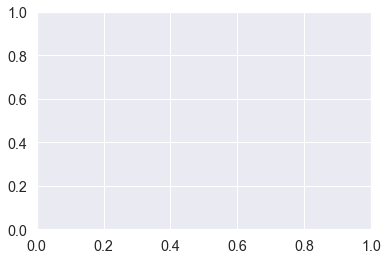

In [46]:
for i in range(24):
    plt.plot(x = df.index[i])